In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import time
import random
import math


#### Build the initial dataframe for EDA. Merge the variables and select the variables which have high correlation value with P_need_assistance

In [ ]:
data = pd.read_csv('bigview_wa.csv')
data.head()

SA2_CODE_2021         SA2_NAME_2021  Age_55_64_yr_M  Age_55_64_yr_F  \
0      502011021  Dawesville - Bouvard             555             600   
1      502011022     Falcon - Wannanup             746             782   
2      502011023           Greenfields             575             675   
3      502011024  Halls Head - Erskine            1285            1504   
4      502011025              Mandurah             697             821   

   Age_55_64_yr_P  Age_65_74_yr_M  Age_65_74_yr_F  Age_65_74_yr_P  \
0            1156             671             667            1335   
1            1530             857             818            1670   
2            1255             551             644            1192   
3            2792            1443            1627            3074   
4            1508             765             829            1596   

   Age_75_84_yr_M  Age_75_84_yr_F  ...  M_Not_in_LF_55_64  M_Not_in_LF_65_74  \
0             348             264  ...                156                527   
1             403             359  ...                219                656   
2             492             614  ...                167                439   
3             984            1056  ...                265               1073   
4             429             496  ...                207                568   

   M_Not_in_LF_75_84  M_Not_in_LF_85ov  F_Not_in_LF_55_64  F_Not_in_LF_65_74  \
0                331                39                241                599   
1                369                84                329                691   
2                445               160                272                540   
3                894               215                594               1393   
4                348               121                337                692   

   F_Not_in_LF_75_84  F_Not_in_LF_85ov  Did_not_go_to_work_M  \
0                254                27                   339   
1                335                93                   358   
2                549               227                   251   
3                960               280                   702   
4                419               169                   234   

   Did_not_go_to_work_F  
0                   283  
1                   306  
2                   268  
3                   633  
4                   251  

[5 rows x 161 columns]

In [ ]:
data.shape

(185, 161)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Columns: 161 entries, SA2_CODE_2021 to Did_not_go_to_work_F
dtypes: float64(3), int64(157), object(1)
memory usage: 232.8+ KB


In [ ]:
pd.set_option('display.max_columns', None)  # or 0
pd.set_option('display.max_rows', None)  # or 0


In [ ]:
data.describe()

SA2_CODE_2021  Age_55_64_yr_M  Age_55_64_yr_F  Age_55_64_yr_P  \
count   1.850000e+02      185.000000      185.000000      185.000000   
mean    5.052641e+08      632.740541      665.751351     1298.437838   
std     1.449380e+06      337.406586      357.247437      692.604887   
min     5.020110e+08        0.000000        0.000000        0.000000   
25%     5.040311e+08      445.000000      456.000000      905.000000   
50%     5.050313e+08      670.000000      689.000000     1356.000000   
75%     5.060711e+08      845.000000      887.000000     1744.000000   
max     5.070513e+08     1512.000000     1504.000000     2944.000000   

       Age_65_74_yr_M  Age_65_74_yr_F  Age_65_74_yr_P  Age_75_84_yr_M  \
count      185.000000      185.000000      185.000000      185.000000   
mean       489.972973      536.881081     1026.886486      259.751351   
std        283.770545      318.304812      599.942038      173.477078   
min          0.000000        0.000000        0.000000        0.000000   
25%        295.000000      316.000000      618.000000      140.000000   
50%        498.000000      542.000000     1032.000000      246.000000   
75%        688.000000      765.000000     1457.000000      367.000000   
max       1443.000000     1627.000000     3074.000000      984.000000   

       Age_75_84_yr_F  Age_75_84_yr_P  Age_85ov_M  Age_85ov_F  Age_85ov_P  \
count      185.000000      185.000000  185.000000  185.000000  185.000000   
mean       297.075676      557.443243   85.502703  135.281081  220.718919   
std        208.222014      379.379239   68.450246  121.699188  188.718582   
min          0.000000        0.000000    0.000000    0.000000    0.000000   
25%        137.000000      275.000000   33.000000   38.000000   71.000000   
50%        274.000000      519.000000   71.000000  107.000000  177.000000   
75%        426.000000      777.000000  129.000000  205.000000  329.000000   
max       1056.000000     2036.000000  302.000000  647.000000  943.000000   

       Indigenous_P_Tot_M  Indigenous_P_Tot_F  Indigenous_P_Tot_P  \
count          185.000000          185.000000          185.000000   
mean           115.216216          112.140541          227.324324   
std            108.556621          102.044863          201.127211   
min              0.000000            0.000000            0.000000   
25%             38.000000           37.000000           75.000000   
50%             81.000000           81.000000          157.000000   
75%            177.000000          183.000000          350.000000   
max            615.000000          620.000000         1200.000000   

       Lang_used_home_Oth_Lang_M  Lang_used_home_Oth_Lang_F  \
count                  185.00000                 185.000000   
mean                  1131.67027                1258.810811   
std                   1141.73012                1181.568574   
min                      0.00000                   0.000000   
25%                    298.00000                 368.000000   
50%                    819.00000                 972.000000   
75%                   1635.00000                1830.000000   
max                   5999.00000                5789.000000   

       Lang_used_home_Oth_Lang_P  Median_age_persons  \
count                 185.000000          185.000000   
mean                 2390.227027           40.264865   
std                  2320.615944            8.253465   
min                     0.000000            0.000000   
25%                   678.000000           36.000000   
50%                  1765.000000           39.000000   
75%                  3448.000000           43.000000   
max                 11783.000000           84.000000   

       Median_mortgage_repay_monthly  Median_tot_prsnl_inc_weekly  \
count                     185.000000                   185.000000   
mean                     1892.129730                   881.545946   
std                       898.808247                   306.045871   
min                         0.00000

In [ ]:
data1 = data.drop(data.columns[1], axis=1)
data1.head()

SA2_CODE_2021  Age_55_64_yr_M  Age_55_64_yr_F  Age_55_64_yr_P  \
0      502011021             555             600            1156   
1      502011022             746             782            1530   
2      502011023             575             675            1255   
3      502011024            1285            1504            2792   
4      502011025             697             821            1508   

   Age_65_74_yr_M  Age_65_74_yr_F  Age_65_74_yr_P  Age_75_84_yr_M  \
0             671             667            1335             348   
1             857             818            1670             403   
2             551             644            1192             492   
3            1443            1627            3074             984   
4             765             829            1596             429   

   Age_75_84_yr_F  Age_75_84_yr_P  Age_85ov_M  Age_85ov_F  Age_85ov_P  \
0             264             615          52          31          80   
1             359             760          85          98         184   
2             614            1106         204         298         506   
3            1056            2036         246         333         580   
4             496             931         151         256         399   

   Indigenous_P_Tot_M  Indigenous_P_Tot_F  Indigenous_P_Tot_P  \
0                  87                  79                 164   
1                 107                  94                 209   
2                 239                 257                 492   
3                 218                 229                 449   
4                 167                 204                 373   

   Lang_used_home_Oth_Lang_M  Lang_used_home_Oth_Lang_F  \
0                        171                        233   
1                        179                        244   
2                        229                        347   
3                        493                        693   
4                        375                        476   

   Lang_used_home_Oth_Lang_P  Median_age_persons  \
0                        401                  45   
1                        419                  49   
2                        576                  47   
3                       1184                  49   
4                        849                  49   

   Median_mortgage_repay_monthly  Median_tot_prsnl_inc_weekly  \
0                           1842                          637   
1                           1733                          647   
2                           1387                          540   
3                           1733                          662   
4                           1300                          573   

   Median_rent_weekly  Median_tot_fam_inc_weekly  \
0                 350                       1712   
1                 320                       1660   
2                 295                       1341   
3                 350                       1784   
4                 270                       1279   

   Average_num_psns_per_bedroom  Median_tot_hhd_inc_weekly  \
0                           0.7                       1436   
1                           0.7                       1294   
2                           0.7                       1004   
3                           0.7                       1377   
4                           0.7                        901   

   Average_household_size  P_55_64_yr_Married  P_55_64_yr_Separated  \
0                     2.6                 776                    49   
1                     2.3                 953                    79   
2                     2.3                 687                    71   
3                     2.4                1895                   124   
4                     1.9                 638                   113   

   P_65_74_yr_Married  P_65_74_yr_Separated  P_75_84_yr_Married  \
0                 991                    43                 458   
1                1170                    62

In [ ]:
data1.corr()

SA2_CODE_2021  Age_55_64_yr_M  Age_55_64_yr_F  \
SA2_CODE_2021                       1.000000       -0.076089       -0.078662   
Age_55_64_yr_M                     -0.076089        1.000000        0.988285   
Age_55_64_yr_F                     -0.078662        0.988285        1.000000   
Age_55_64_yr_P                     -0.077800        0.996885        0.997218   
Age_65_74_yr_M                     -0.158092        0.909809        0.933197   
Age_65_74_yr_F                     -0.133236        0.898158        0.929562   
Age_65_74_yr_P                     -0.145649        0.906392        0.934164   
Age_75_84_yr_M                     -0.189641        0.806557        0.837039   
Age_75_84_yr_F                     -0.153357        0.793619        0.827078   
Age_75_84_yr_P                     -0.170668        0.804009        0.836235   
Age_85ov_M                         -0.127494        0.699569        0.730966   
Age_85ov_F                         -0.103662        0.642489        0.674591   
Age_85ov_P                         -0.111101        0.667559        0.699680   
Indigenous_P_Tot_M                  0.021725        0.459947        0.438521   
Indigenous_P_Tot_F                  0.001169        0.544917        0.545030   
Indigenous_P_Tot_P                  0.013316        0.524305        0.512650   
Lang_used_home_Oth_Lang_M           0.063824        0.524787        0.521466   
Lang_used_home_Oth_Lang_F           0.056341        0.563119        0.561004   
Lang_used_home_Oth_Lang_P           0.060342        0.544723        0.541998   
Median_age_persons                 -0.108821       -0.274129       -0.260225   
Median_mortgage_repay_monthly      -0.178905        0.203727        0.206996   
Median_tot_prsnl_inc_weekly        -0.078346       -0.061678       -0.069016   
Median_rent_weekly                 -0.071104        0.101393        0.102876   
Median_tot_fam_inc_weekly          -0.155860        0.111538        0.110342   
Average_num_psns_per_bedroom       -0.060741        0.048379        0.029832   
Median_tot_hhd_inc_weekly          -0.141605        0.232843        0.226788   
Average_household_size              0.004780        0.427911        0.430427   
P_55_64_yr_Married                 -0.057708        0.937512        0.941460   
P_55_64_yr_Separated               -0.076856        0.818582        0.810048   
P_65_74_yr_Married                 -0.130915        0.853280        0.886902   
P_65_74_yr_Separated               -0.132052        0.792966        0.797037   
P_75_84_yr_Married                 -0.184894        0.774309        0.811241   
P_75_84_yr_Separated               -0.111144        0.692415        0.706031   
P_85ov_Married                     -0.137778        0.690222        0.723126   
P_85ov_Separated                   -0.108812        0.417858        0.446463   
P_Australia_Tot                    -0.054157        0.900842        0.912387   
P_Canada_Tot                       -0.158833        0.615270        0.617668   
P_China_Tot                         0.045452        0.396047        0.392125   
P_England_Tot                      -0.046896        0.699429        0.694897   
P_France_Tot                       -0.117889        0.477692        0.462599   
P_Germany_Tot                      -0.079310        0.780522        0.781747   
P_Hong_Kong_SAR_Ch_Tot              0.003986        0.397908        0.399280   
P_India_Tot                         0.074308        0.338200        0.336904   
P_Ireland_Tot                      -0.148019        0.647039        0.652408   
P_Italy_Tot                        -0.016269        0.422117        0.422413   
P_Japan_Tot                        -0.181267        0.365575        0.357138   
P_Korea_South_Tot                   0.114247        0.319797        0.309556   
P_Malaysia_Tot                      0.141293        0.383620        0.395508   
P_New_Zealand_Tot                   0.046570        0.660556        0.661666   
P_Philippines_Tot              

An interesting thing here is that if we take a look at the correlation between people needed assistance and any of other variables, we barely found a negative correlation of them.

In [ ]:
corr_matrix = data1.corr()
high_corr_vars = corr_matrix[abs(corr_matrix['M_55ov_need_assistance']) > 0.5]['M_55ov_need_assistance']
print(high_corr_vars.sort_values(ascending=False))


M_55ov_need_assistance           1.000000
F_55ov_need_assistance           0.958285
F_55ov_Mental_health_cond        0.945959
F_55ov_Heart_disease             0.944377
F_55ov_0_499_income              0.938682
M_55ov_0_499_income              0.936998
F_55ov_Arthritis                 0.933278
M_55ov_Mental_health_cond        0.930458
M_55ov_Stroke                    0.929282
F_55ov_Kidney_disease            0.922090
F_55ov_Lung_cond                 0.919144
F_55ov_Stroke                    0.918418
F_55ov_Asthma                    0.917403
F_55ov_Diabetes                  0.913930
M_55ov_Lung_cond                 0.903773
M_55ov_Kidney_disease            0.903070
M_55ov_Diabetes                  0.901915
M_55ov_Heart_disease             0.899072
M_55ov_Arthritis                 0.892095
P_65_74_yr_Separated             0.890759
Age_75_84_yr_F                   0.889340
M_55ov_Asthma                    0.884580
F_Not_in_LF_75_84                0.883929
Age_75_84_yr_P                   0

In [ ]:
data1['P_need_assistance'] = data1['M_55ov_need_assistance'] + data1['F_55ov_need_assistance']
data1.head()


SA2_CODE_2021  Age_55_64_yr_M  Age_55_64_yr_F  Age_55_64_yr_P  \
0      502011021             555             600            1156   
1      502011022             746             782            1530   
2      502011023             575             675            1255   
3      502011024            1285            1504            2792   
4      502011025             697             821            1508   

   Age_65_74_yr_M  Age_65_74_yr_F  Age_65_74_yr_P  Age_75_84_yr_M  \
0             671             667            1335             348   
1             857             818            1670             403   
2             551             644            1192             492   
3            1443            1627            3074             984   
4             765             829            1596             429   

   Age_75_84_yr_F  Age_75_84_yr_P  Age_85ov_M  Age_85ov_F  Age_85ov_P  \
0             264             615          52          31          80   
1             359             760          85          98         184   
2             614            1106         204         298         506   
3            1056            2036         246         333         580   
4             496             931         151         256         399   

   Indigenous_P_Tot_M  Indigenous_P_Tot_F  Indigenous_P_Tot_P  \
0                  87                  79                 164   
1                 107                  94                 209   
2                 239                 257                 492   
3                 218                 229                 449   
4                 167                 204                 373   

   Lang_used_home_Oth_Lang_M  Lang_used_home_Oth_Lang_F  \
0                        171                        233   
1                        179                        244   
2                        229                        347   
3                        493                        693   
4                        375                        476   

   Lang_used_home_Oth_Lang_P  Median_age_persons  \
0                        401                  45   
1                        419                  49   
2                        576                  47   
3                       1184                  49   
4                        849                  49   

   Median_mortgage_repay_monthly  Median_tot_prsnl_inc_weekly  \
0                           1842                          637   
1                           1733                          647   
2                           1387                          540   
3                           1733                          662   
4                           1300                          573   

   Median_rent_weekly  Median_tot_fam_inc_weekly  \
0                 350                       1712   
1                 320                       1660   
2                 295                       1341   
3                 350                       1784   
4                 270                       1279   

   Average_num_psns_per_bedroom  Median_tot_hhd_inc_weekly  \
0                           0.7                       1436   
1                           0.7                       1294   
2                           0.7                       1004   
3                           0.7                       1377   
4                           0.7                        901   

   Average_household_size  P_55_64_yr_Married  P_55_64_yr_Separated  \
0                     2.6                 776                    49   
1                     2.3                 953                    79   
2                     2.3                 687                    71   
3                     2.4                1895                   124   
4                     1.9                 638                   113   

   P_65_74_yr_Married  P_65_74_yr_Separated  P_75_84_yr_Married  \
0                 991                    43                 458   
1                1170                    62

In [ ]:
corr_matrix = data1.corr()
high_corr_vars = corr_matrix[corr_matrix['P_need_assistance'] > 0.75]['P_need_assistance']
print(high_corr_vars.sort_values(ascending=False))


P_need_assistance            1.000000
F_55ov_need_assistance       0.993607
M_55ov_need_assistance       0.984425
F_55ov_Heart_disease         0.954995
F_55ov_Mental_health_cond    0.952223
F_55ov_Arthritis             0.929344
F_55ov_0_499_income          0.928239
F_55ov_Stroke                0.925480
M_55ov_Mental_health_cond    0.910407
F_55ov_Kidney_disease        0.910309
M_55ov_Stroke                0.907835
M_55ov_0_499_income          0.907739
F_55ov_Asthma                0.905802
F_55ov_Lung_cond             0.904923
Age_75_84_yr_F               0.900405
F_55ov_Diabetes              0.898260
F_Not_in_LF_75_84            0.894686
Age_85ov_P                   0.892254
Age_85ov_M                   0.891650
M_55ov_Heart_disease         0.891362
Age_75_84_yr_P               0.886737
F_LonePsn_65_74              0.886690
M_55ov_Kidney_disease        0.885556
F_LonePsn_75_84              0.884235
M_55ov_Dementia              0.882654
Age_85ov_F                   0.882235
M_Not_in_LF_

In [ ]:
data2 = data1[[
  'P_need_assistance',
  'F_55ov_Heart_disease',
  'F_55ov_Mental_health_cond',
  'F_55ov_Arthritis',
  'F_55ov_0_499_income',
  'F_55ov_Stroke',
  'M_55ov_Mental_health_cond',
  'F_55ov_Kidney_disease',
  'M_55ov_Stroke',
  'M_55ov_0_499_income',
  'F_55ov_Asthma',
  'F_55ov_Lung_cond',
  'Age_75_84_yr_F',
  'F_55ov_Diabetes',
  'F_Not_in_LF_75_84',
  'Age_85ov_P',
  'M_55ov_Heart_disease',
  'Age_75_84_yr_P',
  'F_LonePsn_65_74',
  'M_55ov_Kidney_disease',
  'F_LonePsn_75_84',
  'M_55ov_Dementia',
  'M_Not_in_LF_85ov',
  'F_55ov_Cancer',
  'M_55ov_Diabetes',
  'M_55ov_Asthma',
  'F_Not_in_LF_85ov',
  'M_55ov_500_999_income',
  'M_55ov_Arthritis',
  'F_55ov_500_999_income',
  'P_65_74_yr_Separated',
  'M_55ov_Lung_cond',
  'M_Not_in_LF_75_84',
  'A85ov_SEO_T',
  'Age_75_84_yr_M',
  'P_75_84_yr_Separated',
  'M_LonePsn_85ov',
  'P_85ov_Married',
  'Age_65_74_yr_F',
  'M_Not_in_LF_55_64',
  'M_LonePsn_75_84',
  'F_Not_in_LF_65_74',
  'F_55ov_noneed_assistance',
  'F_55ov_Dementia',
  'Age_65_74_yr_P',
  'F_Not_in_LF_55_64',
  'M_55ov_Cancer',
  'M_Not_in_LF_65_74',
  'M_55ov_noneed_assistance',
  'Age_55_64_yr_F',
  'Age_65_74_yr_M',
  'Total_dwelings',
  'F_LonePsn_85ov',
  'M_55ov_ev_ser',
  'Age_55_64_yr_P',
  'F_LonePsn_55_64',
  'A75_84_SEO_T',
  'M_LonePsn_65_74',
  'P_55_64_yr_Separated',
  'M_55ov_1000_1499_income',
  'Age_55_64_yr_M',
  'P_75_84_yr_Married',
  'Christianity_Tot_P',
  'P_Australia_Tot',
  'F_55ov_ev_ser',
  'P_75_84y_DUDW_15_29_h',
  'M_LonePsn_55_64',
  'P_75_84y_DUDW_30_h_mo',
  'P_75_84y_DUDW_15_29_h',
]].copy()
data2.head()

P_need_assistance  F_55ov_Heart_disease  F_55ov_Mental_health_cond  \
0                249                    89                        142   
1                373                   168                        207   
2                612                   262                        259   
3                782                   396                        395   
4                543                   235                        284   

   F_55ov_Arthritis  F_55ov_0_499_income  F_55ov_Stroke  \
0               465                  717             31   
1               584                  887             61   
2               795                 1093             74   
3              1404                 1857            126   
4               765                 1007             68   

   M_55ov_Mental_health_cond  F_55ov_Kidney_disease  M_55ov_Stroke  \
0                        121                     21             52   
1                        157                     36             55   
2                        171                     63             91   
3                        251                    108            126   
4                        172                     48             83   

   M_55ov_0_499_income  F_55ov_Asthma  F_55ov_Lung_cond  Age_75_84_yr_F  \
0                  590            145                67             264   
1                  695            190                97             359   
2                  749            270               173             614   
3                 1214            471               232            1056   
4                  729            269               181             496   

   F_55ov_Diabetes  F_Not_in_LF_75_84  Age_85ov_P  M_55ov_Heart_disease  \
0              123                254          80                   274   
1              176                335         184                   328   
2              293                549         506                   380   
3              386                960         580                   690   
4              267                419         399                   321   

   Age_75_84_yr_P  F_LonePsn_65_74  M_55ov_Kidney_disease  F_LonePsn_75_84  \
0             615               98                     45               58   
1             760              131                     53               90   
2            1106              185                     75              228   
3            2036              349                    126              327   
4             931              265                     56              222   

   M_55ov_Dementia  M_Not_in_LF_85ov  F_55ov_Cancer  M_55ov_Diabetes  \
0               16                39            107              215   
1               28                84            156              272   
2               35               160            210              329   
3               53               215            346              568   
4               29               121            190              292   

   M_55ov_Asthma  F_Not_in_LF_85ov  M_55ov_500_999_income  M_55ov_Arthritis  \
0            111                27                    394               348   
1            117                93                    506               426   
2            123               227                    400               450   
3            200               280                    905               790   
4            119               169                    442               418   

   F_55ov_500_999_income  P_65_74_yr_Separated  M_55ov_Lung_cond  \
0                    395                    43                92   
1                    510                    62               105   
2                    544                    64               143   
3                   1149                    80               233   
4                    598                    83               134   

   M_Not_in_LF_75_84  A85ov_SEO_T  Age_75_84_yr_M  P_75_84_yr_Separated  \
0                331     

In [ ]:
data2.shape

(185, 69)

In [ ]:
data2['P_55ov_Heart_disease'] = data2['F_55ov_Heart_disease'] + data2['M_55ov_Heart_disease']
data2['P_55ov_Mental_health_cond'] = data2['F_55ov_Mental_health_cond'] + data2['M_55ov_Mental_health_cond']
data2['P_55ov_Arthritis'] = data2['F_55ov_Arthritis'] + data2['M_55ov_Arthritis']
data2['P_55ov_0_499_income'] = data2['F_55ov_0_499_income'] + data2['M_55ov_0_499_income']
data2['P_55ov_500_999_income'] = data2['F_55ov_500_999_income'] + data2['M_55ov_500_999_income']
data2['P_55ov_Stroke'] = data2['F_55ov_Stroke'] + data2['M_55ov_Stroke']
data2['P_55ov_Asthma'] = data2['F_55ov_Asthma'] + data2['M_55ov_Asthma']
data2['P_55ov_Lung_cond'] = data2['F_55ov_Lung_cond'] + data2['M_55ov_Lung_cond']
data2['P_55ov_Kidney_disease'] = data2['F_55ov_Kidney_disease'] + data2['M_55ov_Kidney_disease']
data2['P_55ov_Diabetes'] = data2['F_55ov_Diabetes'] + data2['M_55ov_Diabetes']
data2['P_55ov_Dementia'] = data2['F_55ov_Dementia'] + data2['M_55ov_Dementia']
data2['P_55ov_Cancer'] = data2['F_55ov_Cancer'] + data2['M_55ov_Cancer']
data2['P_55ov_noneed_assistance'] = data2['F_55ov_noneed_assistance'] + data2['M_55ov_noneed_assistance']
data2['Age_55_64_yr_P'] = data2['Age_55_64_yr_F'] + data2['Age_55_64_yr_M']
data2['Age_75_84_yr_P'] = data2['Age_75_84_yr_F'] + data2['Age_75_84_yr_M']
data2['P_Not_in_LF_75_84'] = data2['F_Not_in_LF_75_84'] + data2['M_Not_in_LF_75_84']
data2['P_LonePsn_55_64'] = data2['F_LonePsn_55_64'] + data2['M_LonePsn_55_64']
data2['P_LonePsn_65_74'] = data2['F_LonePsn_65_74'] + data2['M_LonePsn_65_74']
data2['P_LonePsn_75_84'] = data2['F_LonePsn_75_84'] + data2['M_LonePsn_75_84']
data2['P_LonePsn_85ov'] = data2['F_LonePsn_85ov'] + data2['M_LonePsn_85ov']
data2['P_55ov_ev_ser'] = data2['F_55ov_ev_ser'] + data2['M_55ov_ev_ser']


data2.head()

P_need_assistance  F_55ov_Heart_disease  F_55ov_Mental_health_cond  \
0                249                    89                        142   
1                373                   168                        207   
2                612                   262                        259   
3                782                   396                        395   
4                543                   235                        284   

   F_55ov_Arthritis  F_55ov_0_499_income  F_55ov_Stroke  \
0               465                  717             31   
1               584                  887             61   
2               795                 1093             74   
3              1404                 1857            126   
4               765                 1007             68   

   M_55ov_Mental_health_cond  F_55ov_Kidney_disease  M_55ov_Stroke  \
0                        121                     21             52   
1                        157                     36             55   
2                        171                     63             91   
3                        251                    108            126   
4                        172                     48             83   

   M_55ov_0_499_income  F_55ov_Asthma  F_55ov_Lung_cond  Age_75_84_yr_F  \
0                  590            145                67             264   
1                  695            190                97             359   
2                  749            270               173             614   
3                 1214            471               232            1056   
4                  729            269               181             496   

   F_55ov_Diabetes  F_Not_in_LF_75_84  Age_85ov_P  M_55ov_Heart_disease  \
0              123                254          80                   274   
1              176                335         184                   328   
2              293                549         506                   380   
3              386                960         580                   690   
4              267                419         399                   321   

   Age_75_84_yr_P  F_LonePsn_65_74  M_55ov_Kidney_disease  F_LonePsn_75_84  \
0             612               98                     45               58   
1             762              131                     53               90   
2            1106              185                     75              228   
3            2040              349                    126              327   
4             925              265                     56              222   

   M_55ov_Dementia  M_Not_in_LF_85ov  F_55ov_Cancer  M_55ov_Diabetes  \
0               16                39            107              215   
1               28                84            156              272   
2               35               160            210              329   
3               53               215            346              568   
4               29               121            190              292   

   M_55ov_Asthma  F_Not_in_LF_85ov  M_55ov_500_999_income  M_55ov_Arthritis  \
0            111                27                    394               348   
1            117                93                    506               426   
2            123               227                    400               450   
3            200               280                    905               790   
4            119               169                    442               418   

   F_55ov_500_999_income  P_65_74_yr_Separated  M_55ov_Lung_cond  \
0                    395                    43                92   
1                    510                    62               105   
2                    544                    64               143   
3                   1149                    80               233   
4                    598                    83               134   

   M_Not_in_LF_75_84  A85ov_SEO_T  Age_75_84_yr_M  P_75_84_yr_Separated  \
0                331     

In [ ]:
fields_to_drop = [
    'F_55ov_Heart_disease', 'M_55ov_Heart_disease',
    'F_55ov_Mental_health_cond', 'M_55ov_Mental_health_cond',
    'F_55ov_Arthritis', 'M_55ov_Arthritis',
    'F_55ov_0_499_income', 'M_55ov_0_499_income',
    'F_55ov_500_999_income', 'M_55ov_500_999_income',
    'F_55ov_Stroke', 'M_55ov_Stroke',
    'F_55ov_Asthma', 'M_55ov_Asthma',
    'F_55ov_Lung_cond', 'M_55ov_Lung_cond',
    'F_55ov_Kidney_disease', 'M_55ov_Kidney_disease',
    'F_55ov_Diabetes', 'M_55ov_Diabetes',
    'F_55ov_Dementia', 'M_55ov_Dementia',
    'F_55ov_Cancer', 'M_55ov_Cancer',
    'F_55ov_noneed_assistance', 'M_55ov_noneed_assistance',
    'Age_55_64_yr_F', 'Age_55_64_yr_M',
    'Age_75_84_yr_F', 'Age_75_84_yr_M',
    'F_Not_in_LF_75_84', 'M_Not_in_LF_75_84',
    'F_LonePsn_55_64', 'M_LonePsn_55_64',
    'F_LonePsn_65_74', 'M_LonePsn_65_74',
    'F_LonePsn_75_84', 'M_LonePsn_75_84',
    'F_LonePsn_85ov', 'M_LonePsn_85ov',
    'F_55ov_ev_ser', 'M_55ov_ev_ser'
]

data2 = data2.drop(fields_to_drop, axis=1)
data2.head()


P_need_assistance  Age_85ov_P  Age_75_84_yr_P  M_Not_in_LF_85ov  \
0                249          80             612                39   
1                373         184             762                84   
2                612         506            1106               160   
3                782         580            2040               215   
4                543         399             925               121   

   F_Not_in_LF_85ov  P_65_74_yr_Separated  A85ov_SEO_T  P_75_84_yr_Separated  \
0                27                    43           22                     8   
1                93                    62           49                    19   
2               227                    64          126                    24   
3               280                    80          170                    40   
4               169                    83           98                    35   

   P_85ov_Married  Age_65_74_yr_F  M_Not_in_LF_55_64  F_Not_in_LF_65_74  \
0              48             667                156                599   
1              81             818                219                691   
2             204             644                167                540   
3             233            1627                265               1393   
4             122             829                207                692   

   Age_65_74_yr_P  F_Not_in_LF_55_64  M_Not_in_LF_65_74  Age_65_74_yr_M  \
0            1335                241                527             671   
1            1670                329                656             857   
2            1192                272                439             551   
3            3074                594               1073            1443   
4            1596                337                568             765   

   Total_dwelings  Age_55_64_yr_P  A75_84_SEO_T  P_55_64_yr_Separated  \
0            3104            1155           228                    49   
1            3867            1528           250                    79   
2            4053            1250           364                    71   
3            7834            2789           700                   124   
4            4664            1518           300                   113   

   M_55ov_1000_1499_income  P_75_84_yr_Married  Christianity_Tot_P  \
0                      167                 458                3627   
1                      259                 530                4292   
2                      146                 645                4113   
3                      497                1346                9194   
4                      207                 468                4101   

   P_Australia_Tot  P_75_84y_DUDW_15_29_h  P_75_84y_DUDW_30_h_mo  \
0             5846                    118                     98   
1             6807                     97                    117   
2             7014                    168                    139   
3            13145                    292                    281   
4             6393                     96                    101   

   P_75_84y_DUDW_15_29_h  P_55ov_Heart_disease  P_55ov_Mental_health_cond  \
0                    118                   363                        263   
1                     97                   496                        364   
2                    168                   642                        430   
3                    292                  1086                        646   
4                     96                   556                        456   

   P_55ov_Arthritis  P_55ov_0_499_income  P_55ov_500_999_income  \
0               813                 1307                    789   
1              1010                 1582                   1016   
2              1245                 1842                    944   
3              2194                 3071                   2054   
4              1183                 1736                   1040   

   P_55ov_Stroke  P_55ov_Asthma  P_55ov_Lung_cond  P_55ov_Kidney

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   P_need_assistance          185 non-null    int64
 1   Age_85ov_P                 185 non-null    int64
 2   Age_75_84_yr_P             185 non-null    int64
 3   M_Not_in_LF_85ov           185 non-null    int64
 4   F_Not_in_LF_85ov           185 non-null    int64
 5   P_65_74_yr_Separated       185 non-null    int64
 6   A85ov_SEO_T                185 non-null    int64
 7   P_75_84_yr_Separated       185 non-null    int64
 8   P_85ov_Married             185 non-null    int64
 9   Age_65_74_yr_F             185 non-null    int64
 10  M_Not_in_LF_55_64          185 non-null    int64
 11  F_Not_in_LF_65_74          185 non-null    int64
 12  Age_65_74_yr_P             185 non-null    int64
 13  F_Not_in_LF_55_64          185 non-null    int64
 14  M_Not_in_LF_65_74         

In [ ]:
data2 = data2.drop(data2.columns[[3,4,10,11,13,14,15,24]], axis=1)
data2.head()


P_need_assistance  Age_85ov_P  Age_75_84_yr_P  P_65_74_yr_Separated  \
0                249          80             612                    43   
1                373         184             762                    62   
2                612         506            1106                    64   
3                782         580            2040                    80   
4                543         399             925                    83   

   A85ov_SEO_T  P_75_84_yr_Separated  P_85ov_Married  Age_65_74_yr_F  \
0           22                     8              48             667   
1           49                    19              81             818   
2          126                    24             204             644   
3          170                    40             233            1627   
4           98                    35             122             829   

   Age_65_74_yr_P  Total_dwelings  Age_55_64_yr_P  A75_84_SEO_T  \
0            1335            3104            1155           228   
1            1670            3867            1528           250   
2            1192            4053            1250           364   
3            3074            7834            2789           700   
4            1596            4664            1518           300   

   P_55_64_yr_Separated  M_55ov_1000_1499_income  P_75_84_yr_Married  \
0                    49                      167                 458   
1                    79                      259                 530   
2                    71                      146                 645   
3                   124                      497                1346   
4                   113                      207                 468   

   Christianity_Tot_P  P_Australia_Tot  P_75_84y_DUDW_30_h_mo  \
0                3627             5846                     98   
1                4292             6807                    117   
2                4113             7014                    139   
3                9194            13145                    281   
4                4101             6393                    101   

   P_55ov_Heart_disease  P_55ov_Mental_health_cond  P_55ov_Arthritis  \
0                   363                        263               813   
1                   496                        364              1010   
2                   642                        430              1245   
3                  1086                        646              2194   
4                   556                        456              1183   

   P_55ov_0_499_income  P_55ov_500_999_income  P_55ov_Stroke  P_55ov_Asthma  \
0                 1307                    789             83            256   
1                 1582                   1016            116            307   
2                 1842                    944            165            393   
3                 3071                   2054            252            671   
4                 1736                   1040            151            388   

   P_55ov_Lung_cond  P_55ov_Kidney_disease  P_55ov_Diabetes  P_55ov_Dementia  \
0               159                     66              338               19   
1               202                     89              448               64   
2               316                    138              622               75   
3               465                    234              954              120   
4               315                    104              559               68   

   P_55ov_Cancer  P_55ov_noneed_assistance  P_Not_in_LF_75_84  \
0            283                      2800                585   
1            358                      3593                704   
2            398                      3150                994   
3            756                      7240               1854   
4            394                      3479                767   

   P_LonePsn_55_64  P_LonePsn_65_74  P_LonePsn_75_84  P_LonePsn_85ov  \
0              129              195           

In [ ]:
data3 = data2
data3.head()

P_need_assistance  Age_85ov_P  Age_75_84_yr_P  P_65_74_yr_Separated  \
0                249          80             612                    43   
1                373         184             762                    62   
2                612         506            1106                    64   
3                782         580            2040                    80   
4                543         399             925                    83   

   A85ov_SEO_T  P_75_84_yr_Separated  P_85ov_Married  Age_65_74_yr_F  \
0           22                     8              48             667   
1           49                    19              81             818   
2          126                    24             204             644   
3          170                    40             233            1627   
4           98                    35             122             829   

   Age_65_74_yr_P  Total_dwelings  Age_55_64_yr_P  A75_84_SEO_T  \
0            1335            3104            1155           228   
1            1670            3867            1528           250   
2            1192            4053            1250           364   
3            3074            7834            2789           700   
4            1596            4664            1518           300   

   P_55_64_yr_Separated  M_55ov_1000_1499_income  P_75_84_yr_Married  \
0                    49                      167                 458   
1                    79                      259                 530   
2                    71                      146                 645   
3                   124                      497                1346   
4                   113                      207                 468   

   Christianity_Tot_P  P_Australia_Tot  P_75_84y_DUDW_30_h_mo  \
0                3627             5846                     98   
1                4292             6807                    117   
2                4113             7014                    139   
3                9194            13145                    281   
4                4101             6393                    101   

   P_55ov_Heart_disease  P_55ov_Mental_health_cond  P_55ov_Arthritis  \
0                   363                        263               813   
1                   496                        364              1010   
2                   642                        430              1245   
3                  1086                        646              2194   
4                   556                        456              1183   

   P_55ov_0_499_income  P_55ov_500_999_income  P_55ov_Stroke  P_55ov_Asthma  \
0                 1307                    789             83            256   
1                 1582                   1016            116            307   
2                 1842                    944            165            393   
3                 3071                   2054            252            671   
4                 1736                   1040            151            388   

   P_55ov_Lung_cond  P_55ov_Kidney_disease  P_55ov_Diabetes  P_55ov_Dementia  \
0               159                     66              338               19   
1               202                     89              448               64   
2               316                    138              622               75   
3               465                    234              954              120   
4               315                    104              559               68   

   P_55ov_Cancer  P_55ov_noneed_assistance  P_Not_in_LF_75_84  \
0            283                      2800                585   
1            358                      3593                704   
2            398                      3150                994   
3            756                      7240               1854   
4            394                      3479                767   

   P_LonePsn_55_64  P_LonePsn_65_74  P_LonePsn_75_84  P_LonePsn_85ov  \
0              129              195           

In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   P_need_assistance          185 non-null    int64
 1   Age_85ov_P                 185 non-null    int64
 2   Age_75_84_yr_P             185 non-null    int64
 3   P_65_74_yr_Separated       185 non-null    int64
 4   A85ov_SEO_T                185 non-null    int64
 5   P_75_84_yr_Separated       185 non-null    int64
 6   P_85ov_Married             185 non-null    int64
 7   Age_65_74_yr_F             185 non-null    int64
 8   Age_65_74_yr_P             185 non-null    int64
 9   Total_dwelings             185 non-null    int64
 10  Age_55_64_yr_P             185 non-null    int64
 11  A75_84_SEO_T               185 non-null    int64
 12  P_55_64_yr_Separated       185 non-null    int64
 13  M_55ov_1000_1499_income    185 non-null    int64
 14  P_75_84_yr_Married        

In [ ]:
corr_matrix2 = data3.corr()
high_corr_vars2 = corr_matrix2[corr_matrix2['P_need_assistance'] > 0.5]['P_need_assistance']
print(high_corr_vars2.sort_values(ascending=False))

P_need_assistance            1.000000
P_55ov_Mental_health_cond    0.945044
P_55ov_Stroke                0.937546
P_55ov_Heart_disease         0.928688
P_55ov_0_499_income          0.923968
P_55ov_Kidney_disease        0.920672
P_55ov_Arthritis             0.913507
P_55ov_Asthma                0.905034
P_55ov_Lung_cond             0.897785
P_55ov_Diabetes              0.894081
Age_85ov_P                   0.892254
P_LonePsn_75_84              0.890171
Age_75_84_yr_P               0.886327
P_Not_in_LF_75_84            0.884441
P_55ov_500_999_income        0.873298
P_55ov_Dementia              0.870154
P_LonePsn_65_74              0.869579
P_65_74_yr_Separated         0.865826
P_55ov_Cancer                0.862566
A85ov_SEO_T                  0.859538
P_75_84_yr_Separated         0.858466
P_85ov_Married               0.853988
Age_65_74_yr_F               0.852663
P_55ov_noneed_assistance     0.840188
Age_65_74_yr_P               0.837281
P_LonePsn_85ov               0.833426
Total_dwelin

It is quite interesting to see here. Because after we having more variables by utilizing new solution of data collection, we can expect that suburbs with high proportion of physical health / mental health issues *may* get higher chance that having more people needed core activity assistance. Some additional factors: number of aged people, number of aged lone person, number of low income people and (surprisingly) total_dwelings

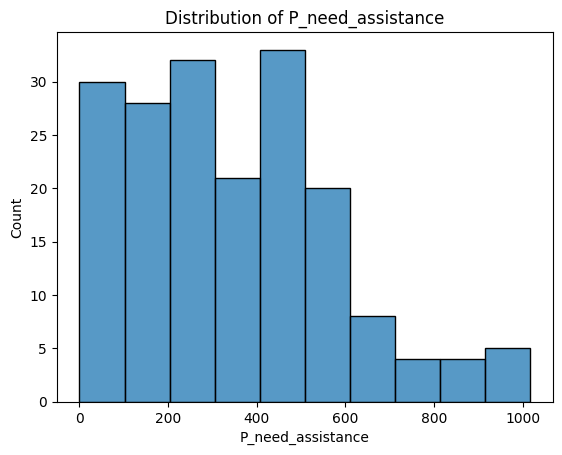

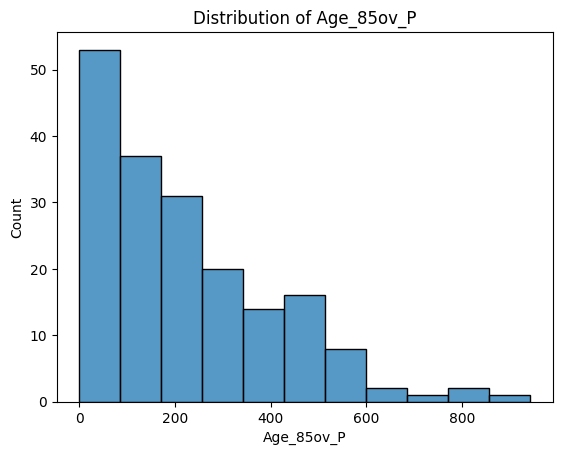

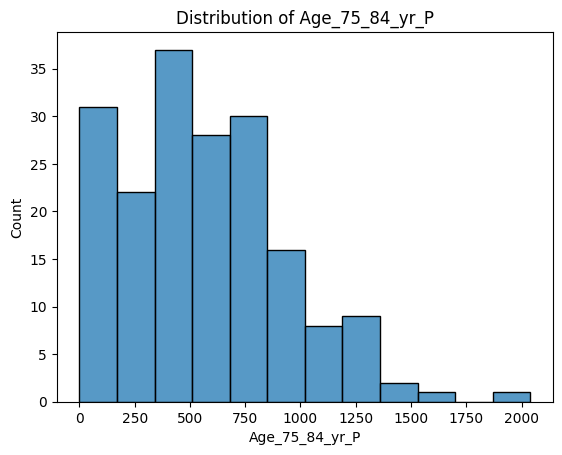

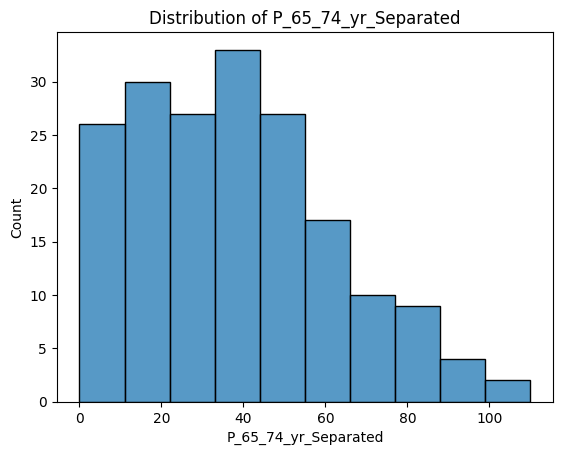

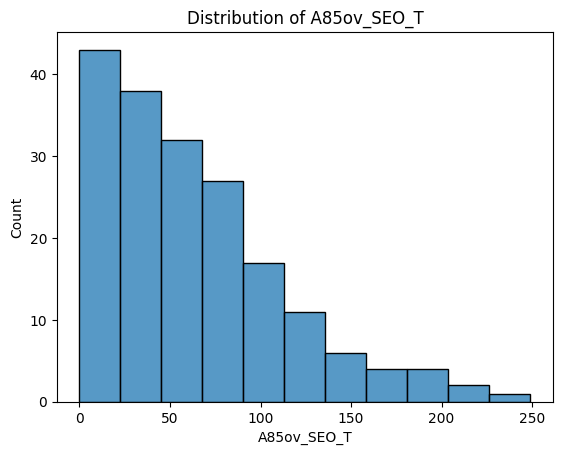

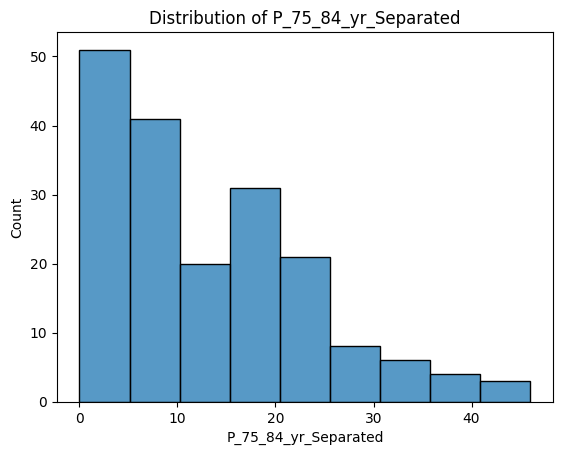

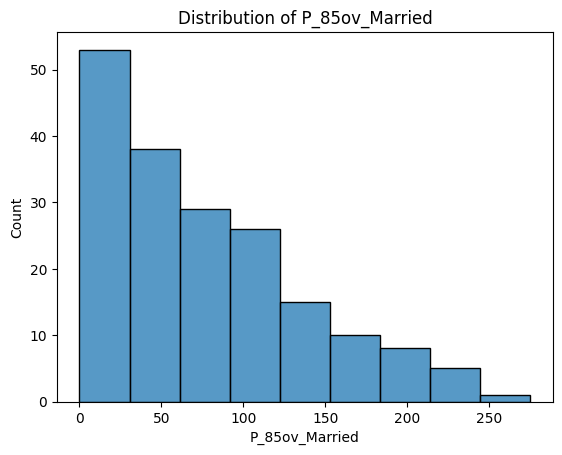

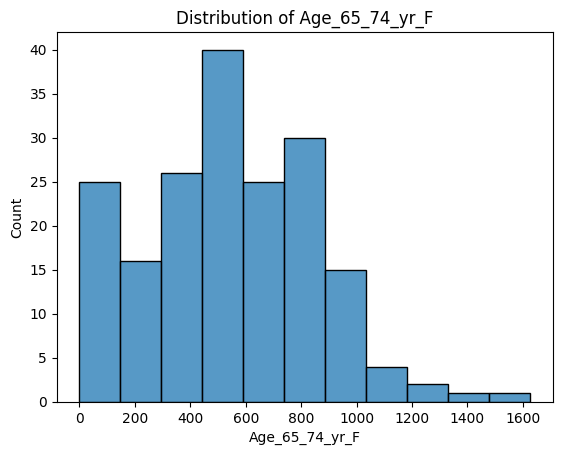

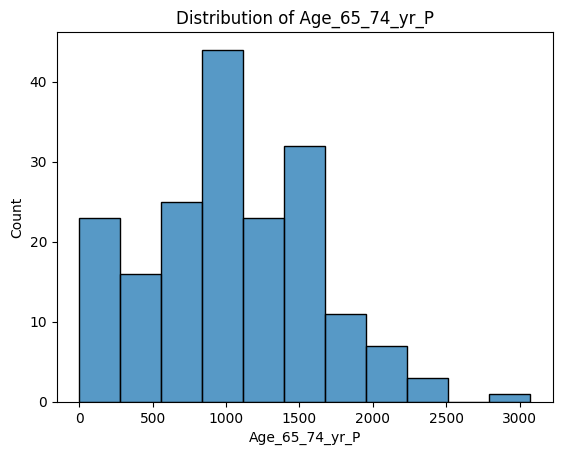

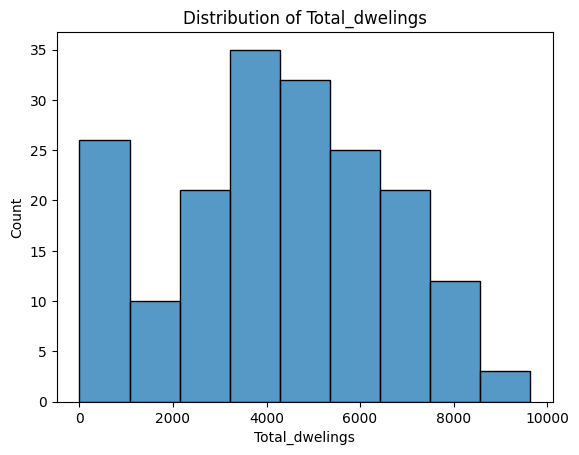

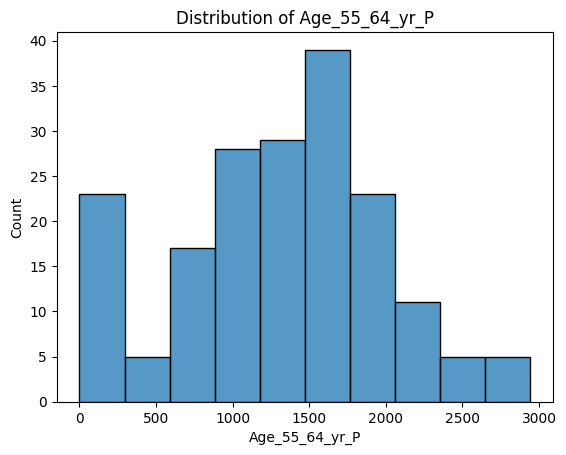

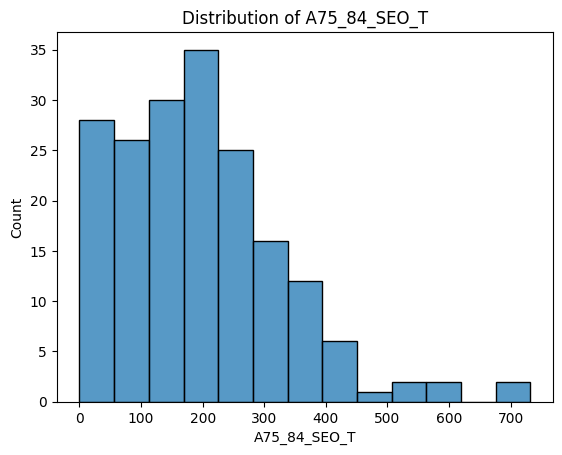

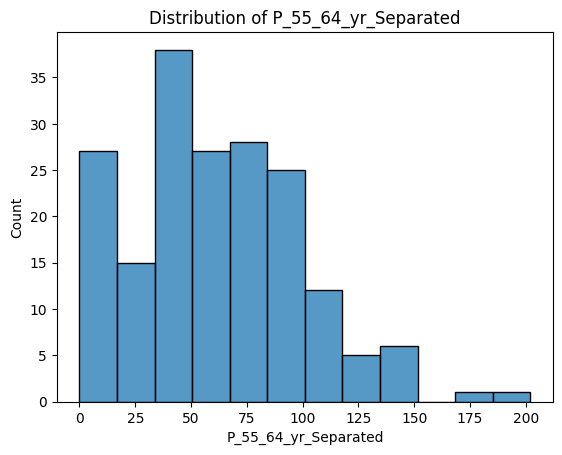

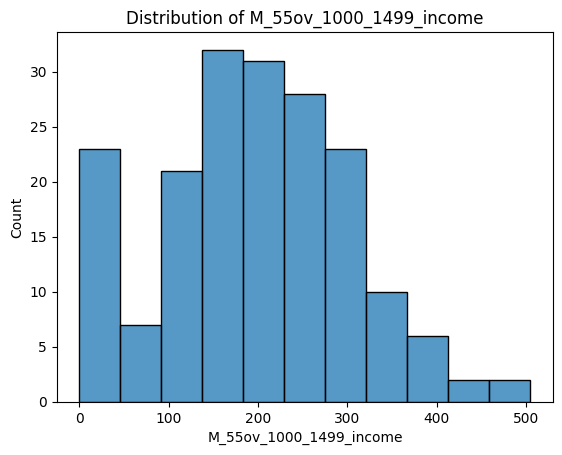

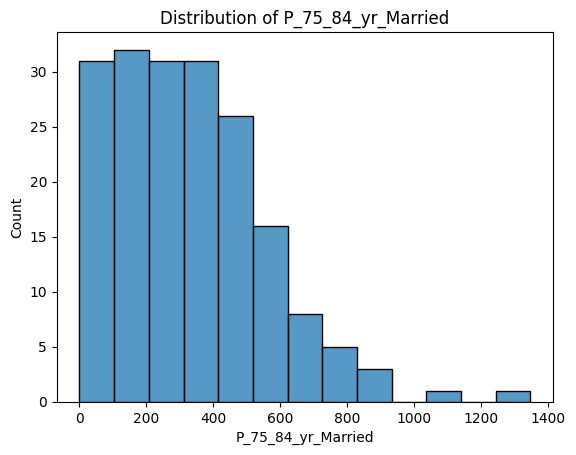

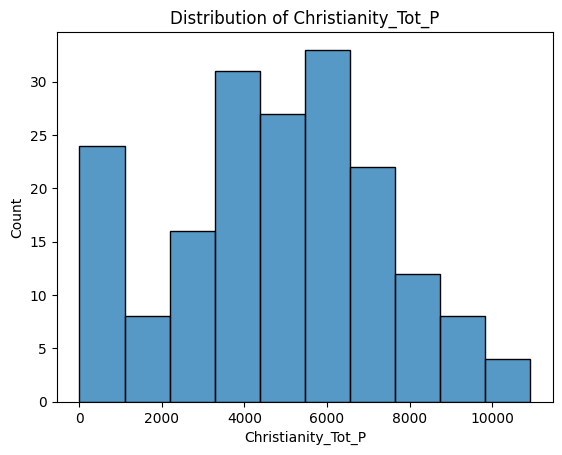

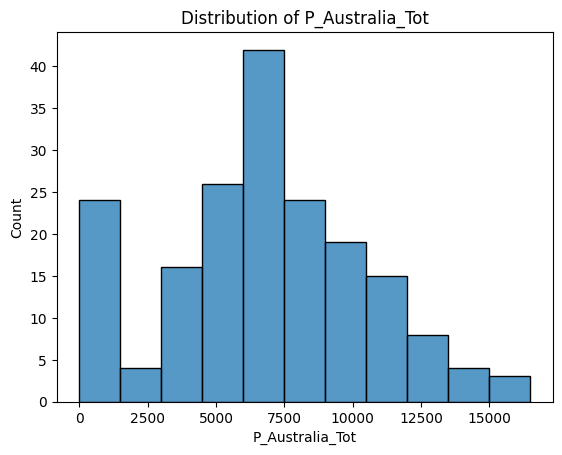

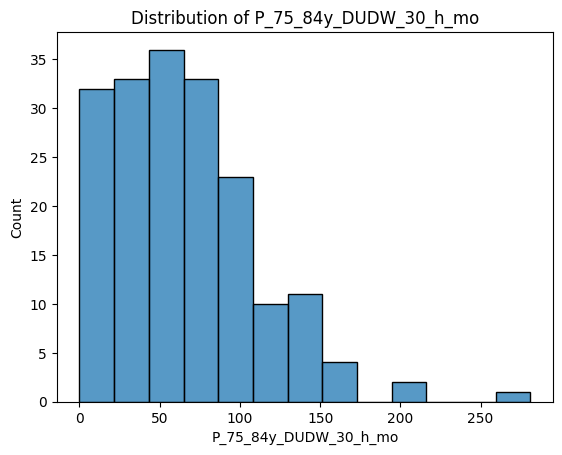

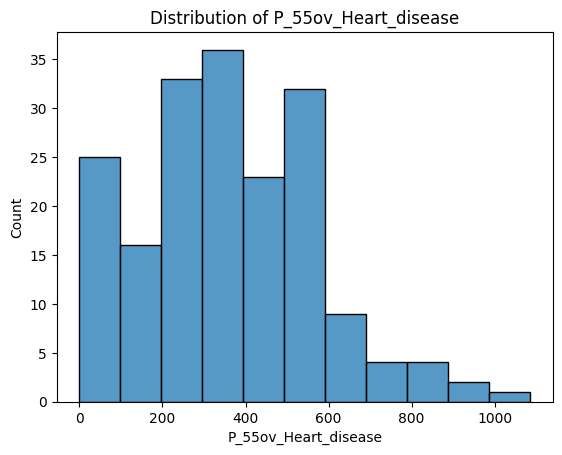

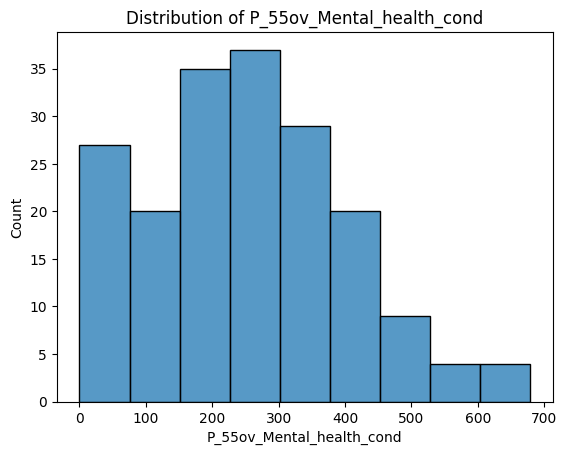

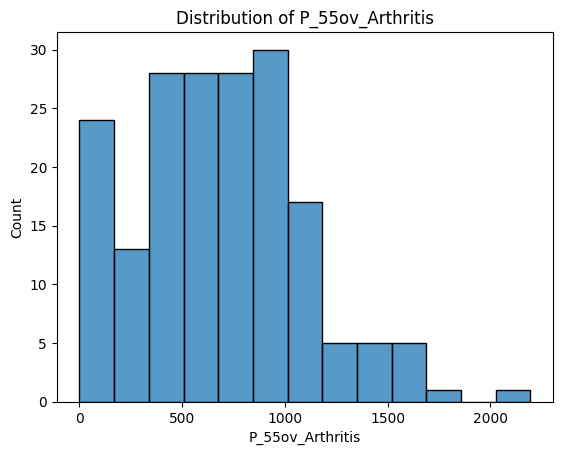

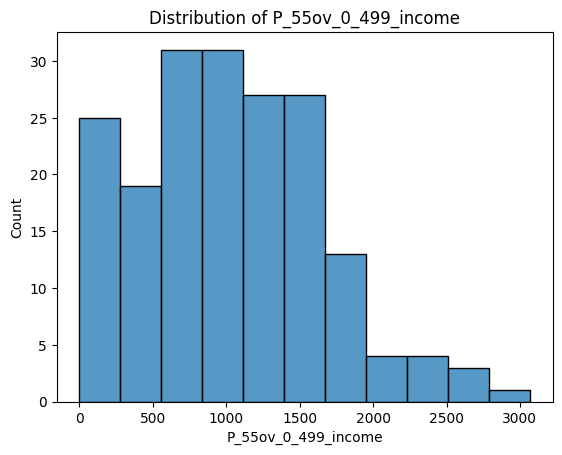

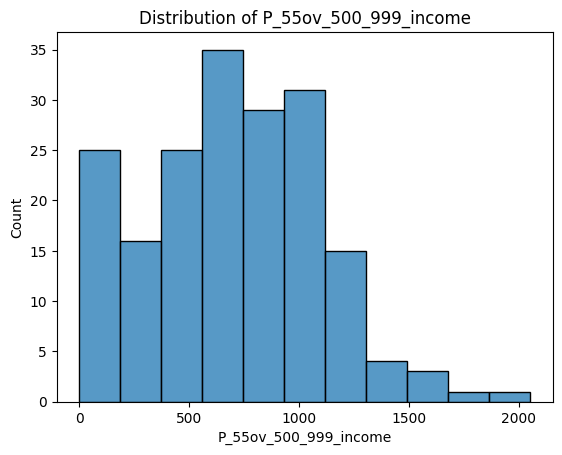

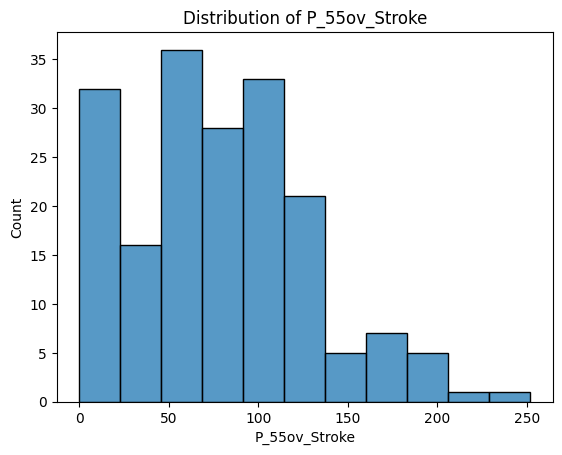

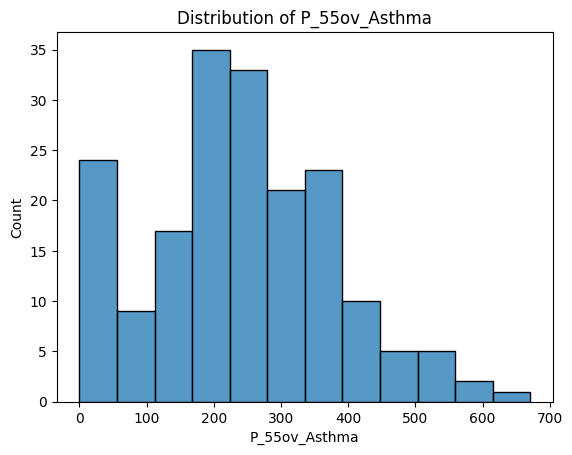

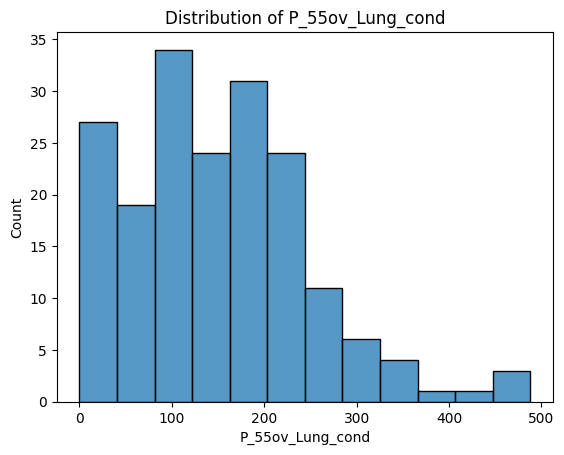

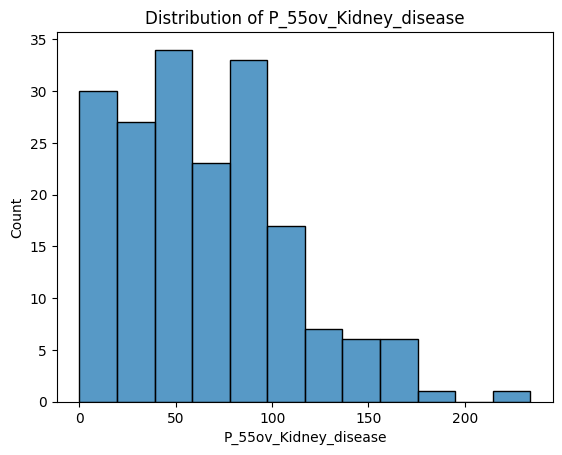

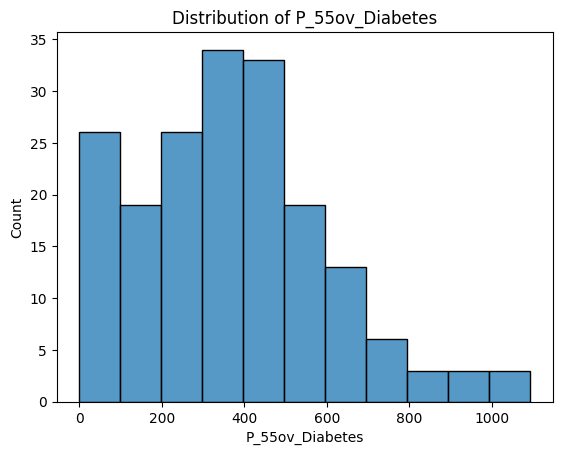

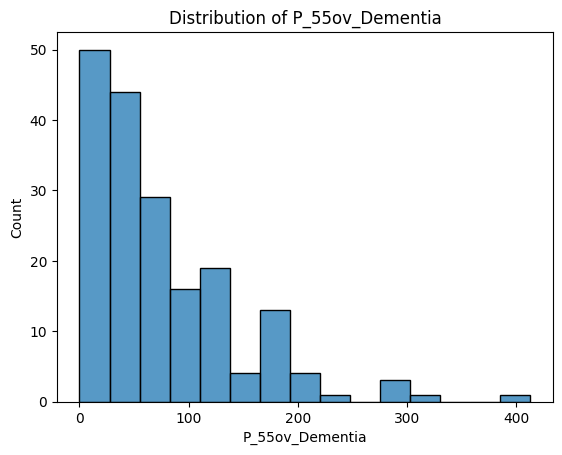

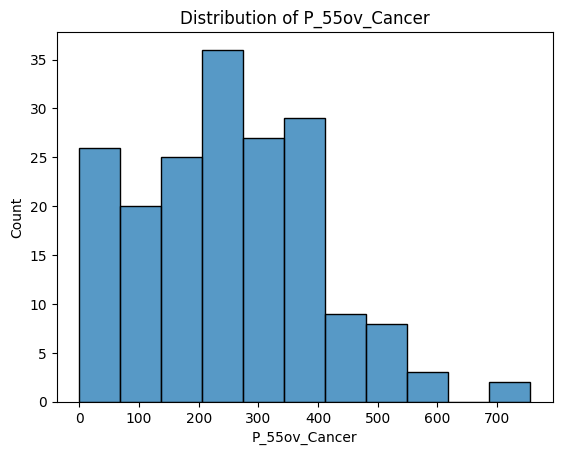

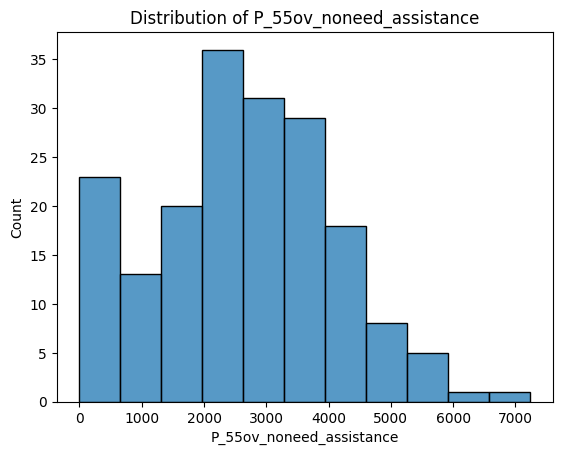

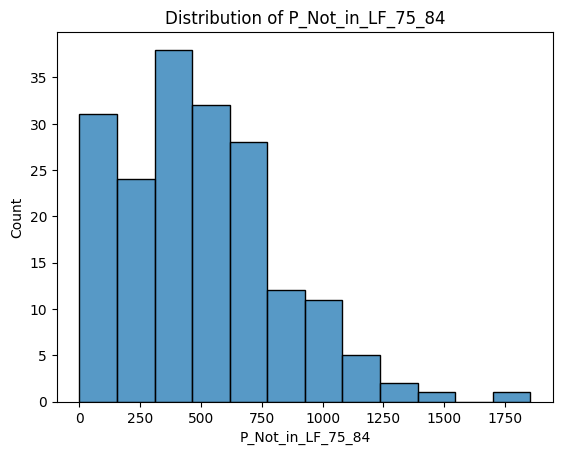

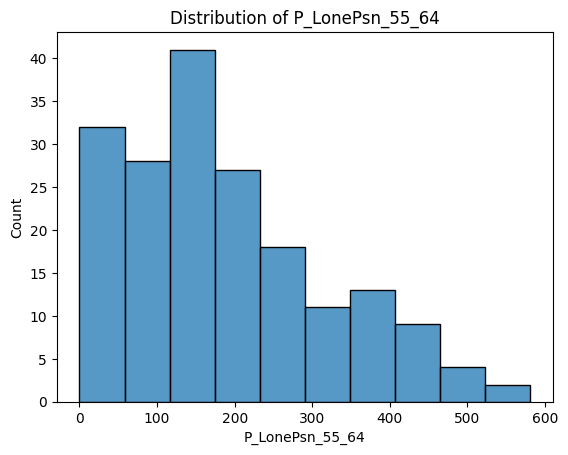

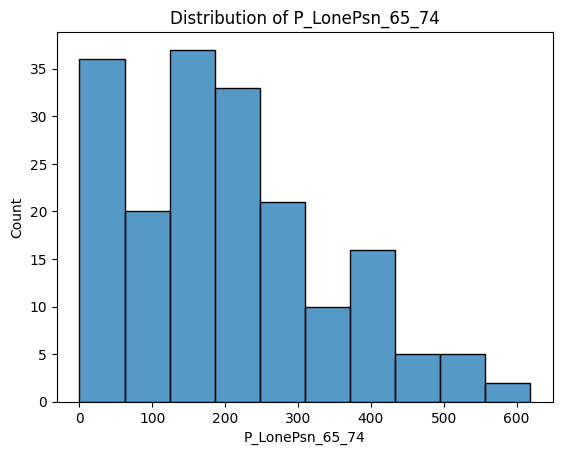

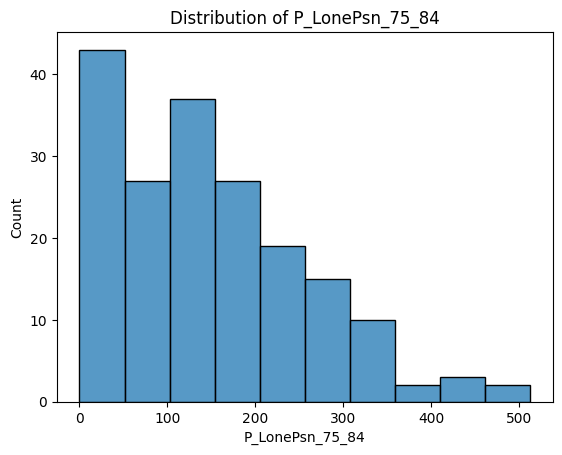

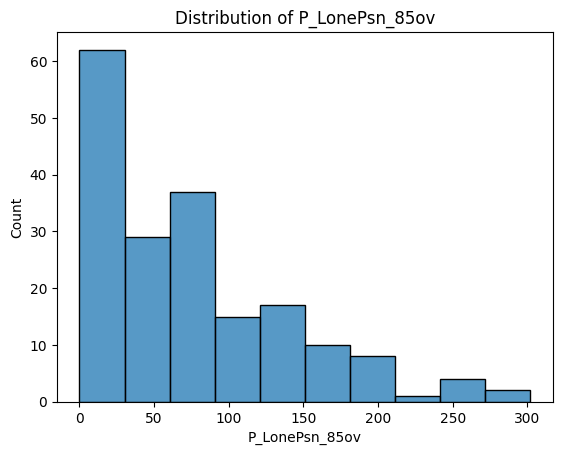

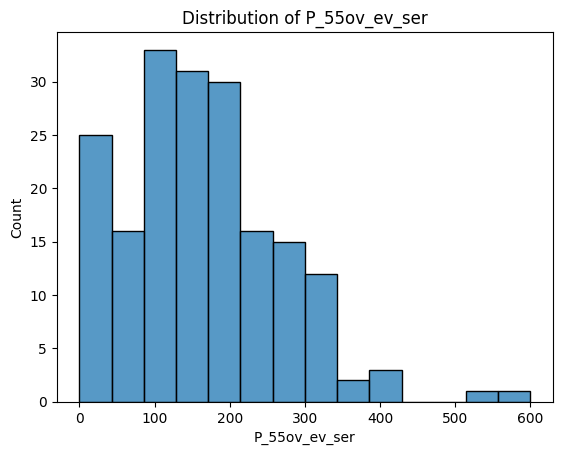

In [ ]:
# Generate the data distribution of all the variables
for column in data3.columns:
  plt.figure()
  sns.histplot(data3[column])
  plt.title(f"Distribution of {column}")
  plt.show()

# Most of the data are right-skewed

In [ ]:
data3.describe()

P_need_assistance  Age_85ov_P  Age_75_84_yr_P  P_65_74_yr_Separated  \
count         185.000000  185.000000      185.000000            185.000000   
mean          340.124324  220.718919      556.827027             37.075676   
std           236.525853  188.718582      379.584000             24.469917   
min             0.000000    0.000000        0.000000              0.000000   
25%           172.000000   71.000000      276.000000             20.000000   
50%           320.000000  177.000000      517.000000             36.000000   
75%           491.000000  329.000000      781.000000             53.000000   
max          1017.000000  943.000000     2040.000000            110.000000   

       A85ov_SEO_T  P_75_84_yr_Separated  P_85ov_Married  Age_65_74_yr_F  \
count   185.000000            185.000000      185.000000      185.000000   
mean     62.572973             12.897297       76.345946      536.881081   
std      51.415997             10.407733       62.419507      318.304812   
min       0.000000              0.000000        0.000000        0.000000   
25%      25.000000              5.000000       27.000000      316.000000   
50%      50.000000             11.000000       64.000000      542.000000   
75%      90.000000             20.000000      115.000000      765.000000   
max     249.000000             46.000000      275.000000     1627.000000   

       Age_65_74_yr_P  Total_dwelings  Age_55_64_yr_P  A75_84_SEO_T  \
count      185.000000      185.000000      185.000000    185.000000   
mean      1026.886486     4208.751351     1298.491892    193.405405   
std        599.942038     2375.926092      692.618222    137.657076   
min          0.000000        0.000000        0.000000      0.000000   
25%        618.000000     2846.000000      899.000000     94.000000   
50%       1032.000000     4305.000000     1359.000000    181.000000   
75%       1457.000000     6041.000000     1740.000000    265.000000   
max       3074.000000     9642.000000     2943.000000    732.000000   

       P_55_64_yr_Separated  M_55ov_1000_1499_income  P_75_84_yr_Married  \
count            185.000000               185.000000          185.000000   
mean              60.518919               195.578378          324.816216   
std               38.837187               111.613831          229.585564   
min                0.000000                 0.000000            0.000000   
25%               35.000000               127.000000          158.000000   
50%               57.000000               203.000000          306.000000   
75%               87.000000               264.000000          461.000000   
max              202.000000               505.000000         1346.000000   

       Christianity_Tot_P  P_Australia_Tot  P_75_84y_DUDW_30_h_mo  \
count          185.000000       185.000000             185.000000   
mean          4779.448649      6802.713514              64.605405   
std           2658.127152      3758.545183              47.150211   
min              0.000000         0.000000               0.000000   
25%           3250.000000      4757.000000              31.000000   
50%           4952.000000      6923.000000              60.000000   
75%           6483.000000      9295.000000              94.000000   
max          10928.000000     16503.000000             281.000000   

       P_55ov_Heart_disease  P_55ov_Mental_health_cond  P_55ov_Arthritis  \
count            185.000000                 185.000000        185.000000   
mean             351.972973                 251.762162        673.605405   
std              217.300469                 155.447872        412.874982   
min                0.000000                   0.000000          0.000000   
25%              219.000000                 148.000000        422.000000   
50%              347.000000                 258.000000        675.000000   
75%              503.000000                 365.000000        919.000000   
max             1086.000000                 679.000000       219

##Preliminary Analysis has finished. Direct to EDA using Power BI (can use notebook to do EDA as well but not preferred due to dashboarding and presentation).

In [ ]:
# Assuming 'SA2_CODE_2021' and 'SA2_NAME_2021' are columns in the 'data' dataframe
sa2_code = data['SA2_CODE_2021']
sa2_name = data['SA2_NAME_2021']

# Insert the columns at the beginning of data3
data3.insert(0, 'SA2_NAME_2021', sa2_name)
data3.insert(0, 'SA2_CODE_2021', sa2_code)

data3.head()


SA2_CODE_2021         SA2_NAME_2021  P_need_assistance  Age_85ov_P  \
0      502011021  Dawesville - Bouvard                249          80   
1      502011022     Falcon - Wannanup                373         184   
2      502011023           Greenfields                612         506   
3      502011024  Halls Head - Erskine                782         580   
4      502011025              Mandurah                543         399   

   Age_75_84_yr_P  P_65_74_yr_Separated  A85ov_SEO_T  P_75_84_yr_Separated  \
0             612                    43           22                     8   
1             762                    62           49                    19   
2            1106                    64          126                    24   
3            2040                    80          170                    40   
4             925                    83           98                    35   

   P_85ov_Married  Age_65_74_yr_F  Age_65_74_yr_P  Total_dwelings  \
0              48             667            1335            3104   
1              81             818            1670            3867   
2             204             644            1192            4053   
3             233            1627            3074            7834   
4             122             829            1596            4664   

   Age_55_64_yr_P  A75_84_SEO_T  P_55_64_yr_Separated  \
0            1155           228                    49   
1            1528           250                    79   
2            1250           364                    71   
3            2789           700                   124   
4            1518           300                   113   

   M_55ov_1000_1499_income  P_75_84_yr_Married  Christianity_Tot_P  \
0                      167                 458                3627   
1                      259                 530                4292   
2                      146                 645                4113   
3                      497                1346                9194   
4                      207                 468                4101   

   P_Australia_Tot  P_75_84y_DUDW_30_h_mo  P_55ov_Heart_disease  \
0             5846                     98                   363   
1             6807                    117                   496   
2             7014                    139                   642   
3            13145                    281                  1086   
4             6393                    101                   556   

   P_55ov_Mental_health_cond  P_55ov_Arthritis  P_55ov_0_499_income  \
0                        263               813                 1307   
1                        364              1010                 1582   
2                        430              1245                 1842   
3                        646              2194                 3071   
4                        456              1183                 1736   

   P_55ov_500_999_income  P_55ov_Stroke  P_55ov_Asthma  P_55ov_Lung_cond  \
0                    789             83            256               159   
1                   1016            116            307               202   
2                    944            165            393               316   
3                   2054            252            671               465   
4                   1040            151            388               315   

   P_55ov_Kidney_disease  P_55ov_Diabetes  P_55ov_Dementia  P_55ov_Cancer  \
0                     66              338               19            283   
1                     89              448               64            358   
2                    138              622               75            398   
3                    234              954              120            756   
4                    104              559               68            394   

   P_55ov_noneed_assistance  P_Not_in_LF_75_84  P_LonePsn_55_64  \
0                      2800                585              129   
1                      3593     

In [ ]:
# data3.to_csv('data3.csv', index=False)
# print('finished')

###Data Modelling. Regression analysis (use P_need_assistance as dependent variable, find the importance of features) and Clustering analysis (see the different characteristics of cerntain clusters).

Regression

In [ ]:
data_reg = data3.drop(['SA2_CODE_2021', 'SA2_NAME_2021'], axis=1)
data_reg.head()

P_need_assistance  Age_85ov_P  Age_75_84_yr_P  P_65_74_yr_Separated  \
0                249          80             612                    43   
1                373         184             762                    62   
2                612         506            1106                    64   
3                782         580            2040                    80   
4                543         399             925                    83   

   A85ov_SEO_T  P_75_84_yr_Separated  P_85ov_Married  Age_65_74_yr_F  \
0           22                     8              48             667   
1           49                    19              81             818   
2          126                    24             204             644   
3          170                    40             233            1627   
4           98                    35             122             829   

   Age_65_74_yr_P  Total_dwelings  Age_55_64_yr_P  A75_84_SEO_T  \
0            1335            3104            1155           228   
1            1670            3867            1528           250   
2            1192            4053            1250           364   
3            3074            7834            2789           700   
4            1596            4664            1518           300   

   P_55_64_yr_Separated  M_55ov_1000_1499_income  P_75_84_yr_Married  \
0                    49                      167                 458   
1                    79                      259                 530   
2                    71                      146                 645   
3                   124                      497                1346   
4                   113                      207                 468   

   Christianity_Tot_P  P_Australia_Tot  P_75_84y_DUDW_30_h_mo  \
0                3627             5846                     98   
1                4292             6807                    117   
2                4113             7014                    139   
3                9194            13145                    281   
4                4101             6393                    101   

   P_55ov_Heart_disease  P_55ov_Mental_health_cond  P_55ov_Arthritis  \
0                   363                        263               813   
1                   496                        364              1010   
2                   642                        430              1245   
3                  1086                        646              2194   
4                   556                        456              1183   

   P_55ov_0_499_income  P_55ov_500_999_income  P_55ov_Stroke  P_55ov_Asthma  \
0                 1307                    789             83            256   
1                 1582                   1016            116            307   
2                 1842                    944            165            393   
3                 3071                   2054            252            671   
4                 1736                   1040            151            388   

   P_55ov_Lung_cond  P_55ov_Kidney_disease  P_55ov_Diabetes  P_55ov_Dementia  \
0               159                     66              338               19   
1               202                     89              448               64   
2               316                    138              622               75   
3               465                    234              954              120   
4               315                    104              559               68   

   P_55ov_Cancer  P_55ov_noneed_assistance  P_Not_in_LF_75_84  \
0            283                      2800                585   
1            358                      3593                704   
2            398                      3150                994   
3            756                      7240               1854   
4            394                      3479                767   

   P_LonePsn_55_64  P_LonePsn_65_74  P_LonePsn_75_84  P_LonePsn_85ov  \
0              129              195           

In [ ]:
data_reg.shape

(185, 37)

####This is a benchmark regression model which utilize huge number of variables. Although the R square looks pretty okay but several concerns:
- dimensional curse
- overfit
- hard to tell the importances of variables and intercorrelation

####Next step:
- use certain methods to figure out the suitable number of variables for a model which is so-called feature selection
- use different algorithms to train the data (random forest, XG boost, Gradient boosting, decision tree, bayesian)
- show the importance of feature (potentially like top 10)
- evaluate the different models compared with the previous benchmark model using a matrix with different indicators.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'P_need_assistance' is the target variable
X = data_reg.drop('P_need_assistance', axis=1)
y = data_reg['P_need_assistance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1254.936113396093
R-squared: 0.9772572902278281


In [ ]:
model.coef_

array([ 1.23380093e-01,  3.44533698e-01,  2.86068530e-01,  4.42993271e-01,
       -6.29814639e-01,  8.89583775e-02, -7.31607733e-03,  2.36061767e-01,
       -7.09880104e-04,  2.37978658e-01, -2.78535350e-01,  1.82203604e-01,
       -1.22951095e-01, -6.52555897e-01,  4.21794431e-03, -2.37897393e-03,
        9.42707141e-03,  1.09784267e-01,  1.59426788e-01,  6.25011540e-02,
        3.07160107e-02, -1.18913246e-01, -9.90681769e-02, -1.19449683e-01,
       -6.34320967e-02,  2.01428018e-01,  2.16621504e-01,  8.17234920e-01,
        1.38707809e-01, -2.35012340e-01,  5.11601906e-01, -8.26260652e-02,
        1.98430185e-02, -5.41000616e-01,  5.54325885e-01,  5.94817976e-02])

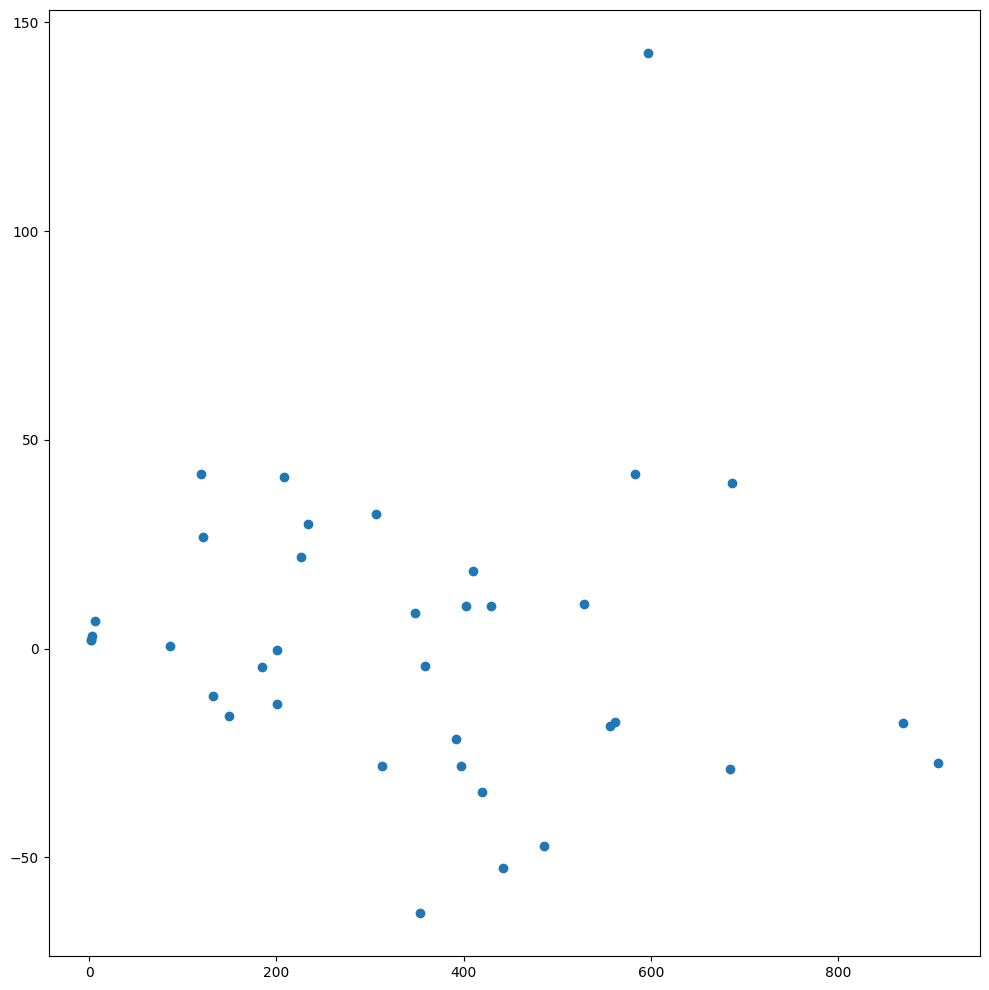

In [ ]:
residuals = y_pred - y_test

plt.figure(figsize = (10,10))
plt.scatter(y_pred, residuals)
plt.tight_layout()

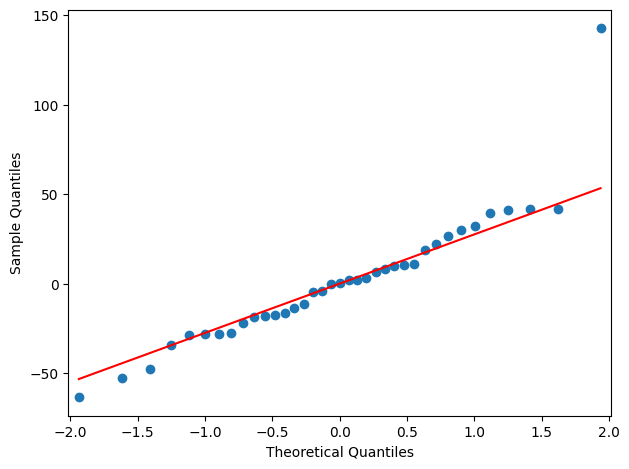

In [ ]:
from statsmodels.graphics.gofplots import qqplot

t = qqplot(residuals, line = 'q')
plt.tight_layout()

In [ ]:
data_reg2 = data_reg[~(data_reg == 0).any(axis=1)]
data_reg2.shape


(153, 37)

In [ ]:
# Apply log transformation to relevant columns
data_reg_log = data_reg2.copy()
for column in data_reg_log.columns:
  if data_reg_log[column].min() > 0:  # Check if all values are positive
    data_reg_log[column] = np.log(data_reg_log[column])

# data_reg_log.head()
# Assuming 'P_need_assistance' is still the target variable
X_log = data_reg_log.drop('P_need_assistance', axis=1)
y_log = data_reg_log['P_need_assistance']

# Split the data into training and testing sets
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Create a linear regression model
model_log = LinearRegression()

# Fit the model to the training data
model_log.fit(X_train_log, y_train_log)

# Make predictions on the test data
y_pred_log = model_log.predict(X_test_log)

# Evaluate the model
mse_log = mean_squared_error(y_test_log, y_pred_log)
r2_log = r2_score(y_test_log, y_pred_log)

print("Mean Squared Error (Log Transformed):", mse_log)
print("R-squared (Log Transformed):", r2_log)

Mean Squared Error (Log Transformed): 0.013635573381531995
R-squared (Log Transformed): 0.9632896359516903


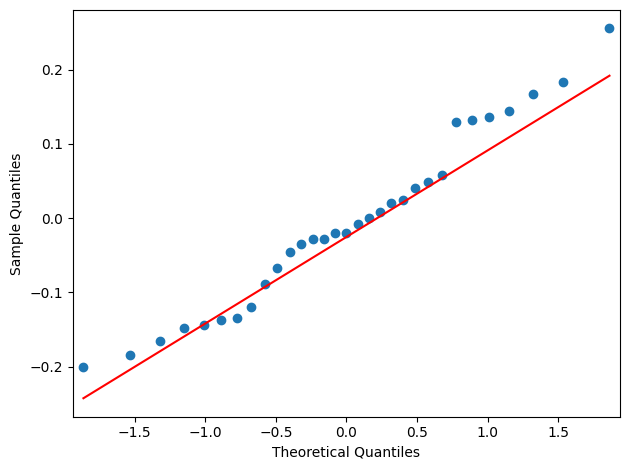

In [ ]:
residuals_log = y_pred_log - y_test_log

t2 = qqplot(residuals_log, line = 'q')
plt.tight_layout()

In [ ]:
from sklearn.feature_selection import mutual_info_regression

# Calculate mutual information
mutual_info = mutual_info_regression(data_reg2.drop('P_need_assistance', axis=1), data_reg2['P_need_assistance'])

# Create a Series to store the results
mi_series = pd.Series(mutual_info, index=data_reg2.drop('P_need_assistance', axis=1).columns)

# Sort the Series in descending order
mi_series.sort_values(ascending=False, inplace=True)

print('Features\t\t\tValue\n',mi_series)


Features			Value
 P_55ov_Mental_health_cond    1.007505
P_55ov_0_499_income          1.000613
P_55ov_Stroke                0.860091
P_55ov_Heart_disease         0.802888
P_55ov_Arthritis             0.772637
P_55ov_Kidney_disease        0.766121
P_55ov_Diabetes              0.730713
P_55ov_Asthma                0.716389
Age_75_84_yr_P               0.693837
P_Not_in_LF_75_84            0.662311
P_55ov_Dementia              0.661617
Age_85ov_P                   0.652403
P_85ov_Married               0.644382
P_55ov_Lung_cond             0.634325
P_55ov_500_999_income        0.609906
P_LonePsn_75_84              0.605581
P_LonePsn_65_74              0.588211
A85ov_SEO_T                  0.581699
Age_65_74_yr_P               0.558399
Total_dwelings               0.535536
Age_65_74_yr_F               0.531528
P_55ov_noneed_assistance     0.492053
P_65_74_yr_Separated         0.481825
P_55ov_Cancer                0.474951
P_LonePsn_55_64              0.468149
P_75_84_yr_Separated         0.4

The code cell above calculates the mutual information value, they are being sorted (descending) and listed. MI value indicates how much information that a certain value has contributed to the target value (P_need_assistance), which, as showed, demonstrates that features like P_55_ov_0_499 income provide high MI for predicting the target value.

In [ ]:
# Assuming 'P_need_assistance' is the target variable
X = data_reg2.drop('P_need_assistance', axis=1)
y = data_reg2['P_need_assistance']

# Initialize a linear regression model
model = LinearRegression()

# Fit the model on the full set of features
model.fit(X, y)
full_deviance = mean_squared_error(y, model.predict(X)) * len(y)  # Calculating the deviance

# Dictionary to store the deviance reduction for each feature
deviance_reduction = {}

# Iterate through each feature
for feature in X.columns:
    X_reduced = X.drop(columns=[feature])  # Drop one feature at a time
    model.fit(X_reduced, y)
    reduced_deviance = mean_squared_error(y, model.predict(X_reduced)) * len(y)

    # Calculate deviance reduction
    deviance_reduction[feature] = full_deviance - reduced_deviance

# Convert to DataFrame for better display
results_df = pd.DataFrame(list(deviance_reduction.items()), columns=['Feature', 'Deviance Reduction'])
results_df = results_df.sort_values(by='Deviance Reduction', ascending=False).reset_index(drop=True)

print(results_df)

                      Feature  Deviance Reduction
0             P_Australia_Tot           -1.181394
1              Age_65_74_yr_F           -6.425535
2        P_55_64_yr_Separated          -11.098399
3        P_65_74_yr_Separated          -24.168782
4               P_55ov_ev_ser          -33.225953
5             P_LonePsn_55_64          -36.411091
6            P_55ov_Arthritis         -115.104095
7            P_55ov_Lung_cond         -164.990669
8               P_55ov_Stroke         -232.185936
9              P_85ov_Married         -262.569197
10      P_55ov_Kidney_disease         -369.974270
11             Age_75_84_yr_P         -425.996506
12              P_55ov_Cancer         -477.774504
13       P_55ov_Heart_disease         -536.040931
14            P_LonePsn_65_74         -620.288292
15    M_55ov_1000_1499_income         -641.627449
16         Christianity_Tot_P         -703.304664
17      P_75_84y_DUDW_30_h_mo         -716.858638
18              P_55ov_Asthma         -724.032168


It is also useful to list the deviance reduction for feature selecting. This reflects the situations that a fittiing gets worse without a certain feature. It's interesting to see that all the features here positively contribute to the model. Removing any of those feature leads to an increasing of deviance of the model. This kinda makes sense because it is already found that we don't really see negative correlation previously. We can still pick up some important features based off the abosolute values.

A quick wrap up of three methods choosing the important features:
_________________________________________________________________
Correlation TOP 15:
- P_55ov_Mental_health_cond    0.945044
- P_55ov_Stroke                0.937546
- P_55ov_Heart_disease         0.928688
- P_55ov_0_499_income          0.923968
- P_55ov_Kidney_disease        0.920672
- P_55ov_Arthritis             0.913507
- P_55ov_Asthma                0.905034
- P_55ov_Lung_cond             0.897785
- P_55ov_Diabetes              0.894081
- Age_85ov_P                   0.892254
- P_LonePsn_75_84              0.890171
- Age_75_84_yr_P               0.886327
- P_Not_in_LF_75_84            0.884441
- P_55ov_500_999_income        0.873298
- P_55ov_Dementia              0.870154
_________________________________________________________________
MI TOP 15:
- P_55ov_0_499_income          1.007640
- P_55ov_Mental_health_cond    1.005155
- P_55ov_Stroke                0.859278
- P_55ov_Heart_disease         0.801019
- P_55ov_Kidney_disease        0.774264
- P_55ov_Arthritis             0.773643
- P_55ov_Diabetes              0.731085
- P_55ov_Asthma                0.719373
- Age_75_84_yr_P               0.693033
- P_55ov_Dementia              0.663638
- P_Not_in_LF_75_84            0.660357
- Age_85ov_P                   0.653353
- P_85ov_Married               0.639268
- P_55ov_Lung_cond             0.626949
- P_LonePsn_75_84              0.616852
_________________________________________________________________
Deviance Reduction TOP 15:
- Total_dwelings               -839.438879
- P_LonePsn_85ov               -1587.364699
- P_55ov_500_999_income        -1864.995948
- Age_85ov_P                   -1975.561767
- P_LonePsn_75_84              -2241.433146
- P_75_84_yr_Separated         -2420.591076
- P_75_84_yr_Married           -2593.130795
- P_55ov_Mental_health_cond    -3209.512210
- A85ov_SEO_T                  -3687.826600
- A75_84_SEO_T                 -3765.408942
- P_Not_in_LF_75_84            -5866.933353
- Age_65_74_yr_P               -6451.040696
- P_55ov_Diabetes              -7569.769562
- Age_55_64_yr_P               -14786.187937
- P_55ov_Dementia              -24557.665127

We want to pick up the features from these.

In [ ]:
common_top_variables = [
    'P_55ov_0_499_income',
'P_55ov_Mental_health_cond',
'P_55ov_Stroke',
'P_55ov_Heart_disease',
'P_55ov_Kidney_disease',
'P_55ov_Arthritis',
'P_55ov_Diabetes',
'P_55ov_Asthma',
'P_Not_in_LF_75_84',
'Age_85ov_P',
'Age_75_84_yr_P',
'P_55ov_Dementia',
]

# Put the DataFrames to be concatenated in a list
dfs_to_concat = [data_reg2[common_top_variables], data_reg2[['P_need_assistance']]]

# Concatenate the DataFrames
data_reg_final = pd.concat(dfs_to_concat, axis=1) # Concatenate along columns

data_reg_final.head()

P_55ov_0_499_income  P_55ov_Mental_health_cond  P_55ov_Stroke  \
0                 1307                        263             83   
1                 1582                        364            116   
2                 1842                        430            165   
3                 3071                        646            252   
4                 1736                        456            151   

   P_55ov_Heart_disease  P_55ov_Kidney_disease  P_55ov_Arthritis  \
0                   363                     66               813   
1                   496                     89              1010   
2                   642                    138              1245   
3                  1086                    234              2194   
4                   556                    104              1183   

   P_55ov_Diabetes  P_55ov_Asthma  P_Not_in_LF_75_84  Age_85ov_P  \
0              338            256                585          80   
1              448            307                704         184   
2              622            393                994         506   
3              954            671               1854         580   
4              559            388                767         399   

   Age_75_84_yr_P  P_55ov_Dementia  P_need_assistance  
0             612               19                249  
1             762               64                373  
2            1106               75                612  
3            2040              120                782  
4             925               68                543

In [ ]:
# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=data_reg_final)

https://docs.google.com/spreadsheets/d/1l4glEOxwFSQZ5ID4buHcAzV5gqMn18VBXps0DHYSxC0#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


Mean Squared Error (Random Forest): 6823.0987903225805
R-squared (Random Forest): 0.8559789418281697


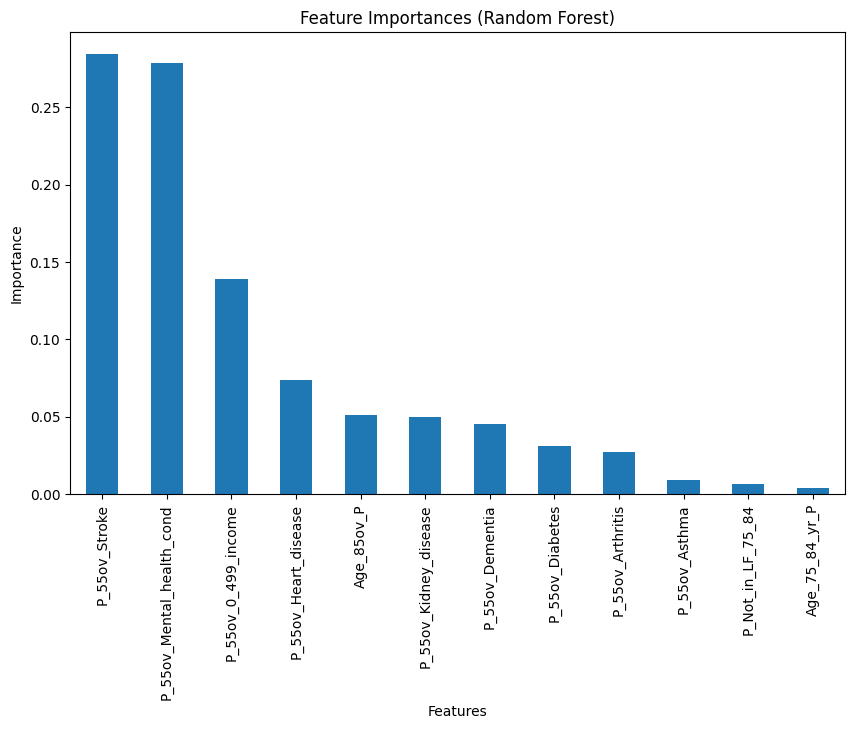

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'P_need_assistance' is the target variable
X = data_reg_final.drop('P_need_assistance', axis=1)
y = data_reg_final['P_need_assistance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print("Mean Squared Error (Random Forest):", mse)
print("R-squared (Random Forest):", r2)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a Series for better visualization
importance_series = pd.Series(feature_importances, index=X.columns)
importance_series.sort_values(ascending=False, inplace=True)

# Visualize feature importances
plt.figure(figsize=(10, 6))
importance_series.plot(kind='bar')
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Assuming 'P_need_assistance' is the target variable
X = data_reg_final.drop('P_need_assistance', axis=1)
y = data_reg_final['P_need_assistance']

# Initialize a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform K-fold cross-validation (e.g., with 5 folds)
scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
mse_scores = -scores

# Print the mean squared error for each fold
print("MSE for each fold:", mse_scores)

# Calculate and print the average mean squared error
average_mse = mse_scores.mean()
print("Average MSE:", average_mse)


MSE for each fold: [3619.54526774 4134.42467097 3231.33332581 4927.56207333 2325.93232333]
Average MSE: 3647.7595322365596


Mean Squared Error (XGBoost): 5883.990354912832
R-squared (XGBoost): 0.8758015172828348


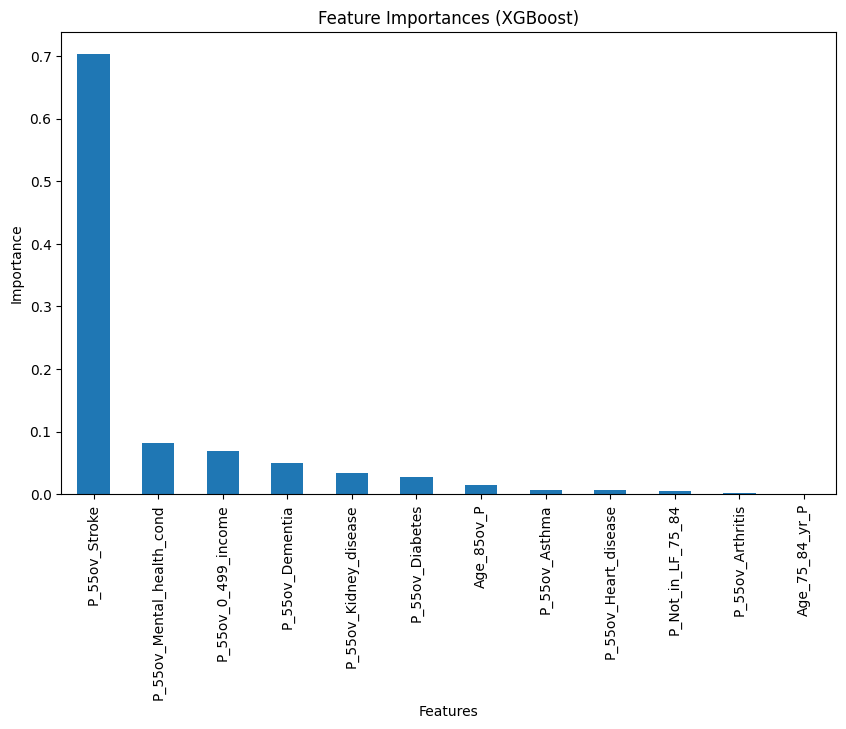

In [ ]:
import xgboost as xgb

# Assuming 'P_need_assistance' is the target variable
X = data_reg_final.drop('P_need_assistance', axis=1)
y = data_reg_final['P_need_assistance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an XGBoost Regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xg = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_xg)
r2 = r2_score(y_test, y_pred_xg)

print("Mean Squared Error (XGBoost):", mse)
print("R-squared (XGBoost):", r2)

# Get feature importances
feature_importances = xgb_model.feature_importances_

# Create a Series for better visualization
importance_series = pd.Series(feature_importances, index=X.columns)
importance_series.sort_values(ascending=False, inplace=True)

# Visualize feature importances
plt.figure(figsize=(10, 6))
importance_series.plot(kind='bar')
plt.title('Feature Importances (XGBoost)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [ ]:
# Assuming 'P_need_assistance' is the target variable
X = data_reg_final.drop('P_need_assistance', axis=1)
y = data_reg_final['P_need_assistance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an XGBoost Regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xg = xgb_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_xg)
print("Mean Absolute Error (MAE):", mae)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_xg, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_xg)
print("R-squared (R2):", r2)

# Explained Variance Score
evs = explained_variance_score(y_test, y_pred_xg)
print("Explained Variance Score:", evs)


Mean Absolute Error (MAE): 48.05206003496724
Root Mean Squared Error (RMSE): 76.70717277356032
R-squared (R2): 0.8758015172828348
Explained Variance Score: 0.8758858168926893


XG Boost is better than Random Forest

In [ ]:
# # prompt: fine tunning the hyperparameter in Gradient boosting

# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid to search over
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 5, 10]
# }

# # Initialize a Gradient Boosting Regressor model
# gb_model = GradientBoostingRegressor(random_state=42)

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid,
#                            scoring='neg_mean_squared_error', cv=5, verbose=2)

# # Fit the grid search to the training data
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Get the best model
# best_gb_model = grid_search.best_estimator_

# # Make predictions on the test data using the best model
# y_pred_best = best_gb_model.predict(X_test)

# # Evaluate the best model
# mse_best = mean_squared_error(y_test, y_pred_best)
# r2_best = r2_score(y_test, y_pred_best)

# print("Mean Squared Error (Best Gradient Boosting):", mse_best)
# print("R-squared (Best Gradient Boosting):", r2_best)


Mean Absolute Error (MAE): 41.009546038333816
Root Mean Squared Error (RMSE): 65.54452667921787
R-squared (R2): 0.9093188119527149
Explained Variance Score: 0.909337642412882


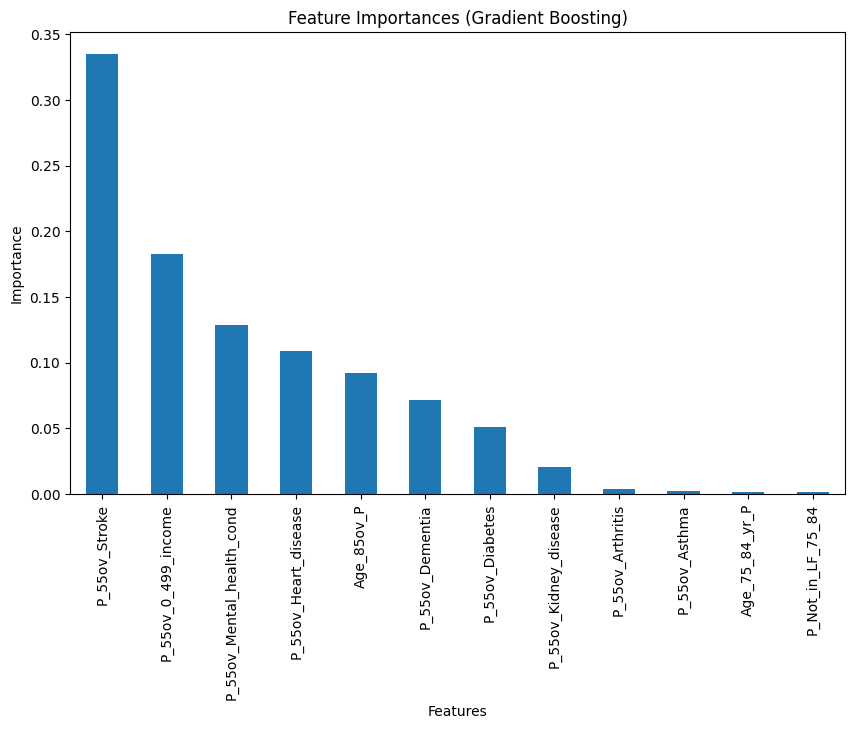

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Assuming 'P_need_assistance' is the target variable
X = data_reg_final.drop('P_need_assistance', axis=1)
y = data_reg_final['P_need_assistance']

# Setting SEED for
SEED = 42

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Initialize a Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators=200, random_state=42)
# 'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 200
# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gradient = gb_model.predict(X_test)

# Evaluate the model

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_gradient)
print("Mean Absolute Error (MAE):", mae)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_gradient, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_gradient)
print("R-squared (R2):", r2)

# Explained Variance Score
evs = explained_variance_score(y_test, y_pred_gradient)
print("Explained Variance Score:", evs)

# Get feature importances
feature_importances = gb_model.feature_importances_

# Create a Series for better visualization
importance_series = pd.Series(feature_importances, index=X.columns)
importance_series.sort_values(ascending=False, inplace=True)

# Visualize feature importances
plt.figure(figsize=(10, 6))
importance_series.plot(kind='bar')
plt.title('Feature Importances (Gradient Boosting)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


Gradient Boost is even better than XG Boost

Mean Absolute Error (MAE): 73.7741935483871
Root Mean Squared Error (RMSE): 102.22382147728266
R-squared (R2): 0.7794289234878278
Explained Variance Score: 0.781893887394694


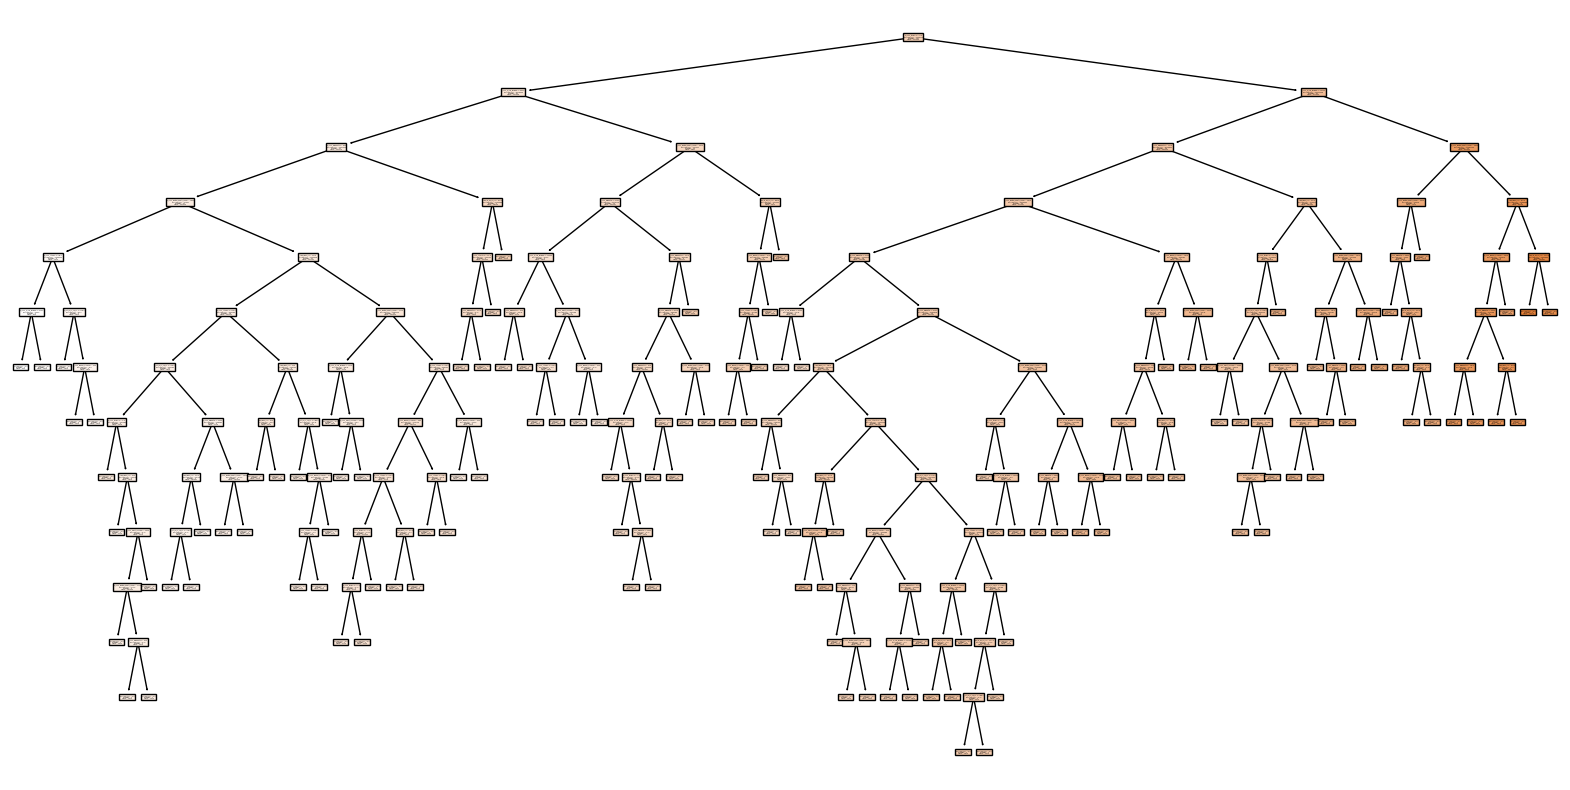

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Assuming 'P_need_assistance' is the target variable
X = data_reg_final.drop('P_need_assistance', axis=1)
y = data_reg_final['P_need_assistance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_decisiontree = dt_model.predict(X_test)

# Evaluate the model

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_decisiontree)
print("Mean Absolute Error (MAE):", mae)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_decisiontree, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_decisiontree)
print("R-squared (R2):", r2)

# Explained Variance Score
evs = explained_variance_score(y_test, y_pred_decisiontree)
print("Explained Variance Score:", evs)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, filled=True)
plt.show()


Decision tree is not as good as gradient boost.

In [ ]:
from sklearn.linear_model import Lasso

# Assuming 'P_need_assistance' is the target variable
X = data_reg_final.drop('P_need_assistance', axis=1)
y = data_reg_final['P_need_assistance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha (regularization strength)

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_lasso)
print("Mean Absolute Error (MAE):", mae)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_lasso, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_lasso)
print("R-squared (R2):", r2)

# Explained Variance Score
evs = explained_variance_score(y_test, y_pred_lasso)
print("Explained Variance Score:", evs)

# Get the coefficients of the Lasso model
lasso_coefficients = lasso_model.coef_

# Create a Series for better visualization
coefficients_series = pd.Series(lasso_coefficients, index=X.columns)

# Print the coefficients
print(coefficients_series)


Mean Absolute Error (MAE): 22.523488129921134
Root Mean Squared Error (RMSE): 28.275924644650882
R-squared (R2): 0.9831236715421793
Explained Variance Score: 0.9832685762276578
P_55ov_0_499_income          0.095509
P_55ov_Mental_health_cond    0.497460
P_55ov_Stroke                0.498281
P_55ov_Heart_disease         0.030246
P_55ov_Kidney_disease        0.167347
P_55ov_Arthritis            -0.095151
P_55ov_Diabetes              0.331736
P_55ov_Asthma               -0.277191
P_Not_in_LF_75_84           -0.245821
Age_85ov_P                   0.375943
Age_75_84_yr_P               0.101884
P_55ov_Dementia              0.733086
dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.386e+04, tolerance: 4.947e+02
  model = cd_fast.enet_coordinate_descent(


The performance of lasso regression is by far pretty good. It handles the intercorrelation problem and has the function of selecting the features. The list means that every unit increase of P_55ov_Dementia will lead to 0.733086 unit P_need_assistance.

In [ ]:
from sklearn.linear_model import BayesianRidge

# Assuming 'P_need_assistance' is the target variable
X = data_reg_final.drop('P_need_assistance', axis=1)
y = data_reg_final['P_need_assistance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Bayesian Ridge Regression model
bayesian_model = BayesianRidge()

# Fit the model to the training data
bayesian_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_bayesian = bayesian_model.predict(X_test)

# Evaluate the model

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_bayesian)
print("Mean Absolute Error (MAE):", mae)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_bayesian, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_bayesian)
print("R-squared (R2):", r2)

# Explained Variance Score
evs = explained_variance_score(y_test, y_pred_bayesian)
print("Explained Variance Score:", evs)

# Get the coefficients of the Bayesian Ridge model
bayesian_coefficients = bayesian_model.coef_

# Create a Series for better visualization
coefficients_series = pd.Series(bayesian_coefficients, index=X.columns).sort_values(ascending=False)

# Print the coefficients
print(coefficients_series)

# Visualize the coefficients
plt.figure(figsize=(10, 6))
coefficients_series.plot(kind='bar')
plt.title('Coefficients of Bayesian Ridge Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()


The Bayesian Ridge regression illustrates similar performance with Lasso regression.

In [ ]:
# Create a dictionary to store model results
model_results = {
    'Model': ['Random Forest', 'XGBoost', 'Gradient Boosting', 'Decision Tree', 'Lasso', 'Bayesian Ridge'],
    'MAE': [
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_xg),
        mean_absolute_error(y_test, y_pred_gradient),
        mean_absolute_error(y_test, y_pred_decisiontree),
        mean_absolute_error(y_test, y_pred_lasso),
        mean_absolute_error(y_test, y_pred_bayesian)
    ],
    'RMSE': [
        mean_squared_error(y_test, y_pred_rf, squared=False),
        mean_squared_error(y_test, y_pred_xg, squared=False),
        mean_squared_error(y_test, y_pred_gradient, squared=False),
        mean_squared_error(y_test, y_pred_decisiontree, squared=False),
        mean_squared_error(y_test, y_pred_lasso, squared=False),
        mean_squared_error(y_test, y_pred_bayesian, squared=False)
    ],
    'R2': [
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xg),
        r2_score(y_test, y_pred_gradient),
        r2_score(y_test, y_pred_decisiontree),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_bayesian)
    ],
    'Explained Variance': [
        explained_variance_score(y_test, y_pred_rf),
        explained_variance_score(y_test, y_pred_xg),
        explained_variance_score(y_test, y_pred_gradient),
        explained_variance_score(y_test, y_pred_decisiontree),
        explained_variance_score(y_test, y_pred_lasso),
        explained_variance_score(y_test, y_pred_bayesian)
    ]
}

# Create a DataFrame from the dictionary
results_df = pd.DataFrame(model_results)

# Display the results table
print(results_df)


               Model        MAE        RMSE        R2  Explained Variance
0      Random Forest  47.302258   82.602051  0.855979            0.856024
1            XGBoost  48.052060   76.707173  0.875802            0.875886
2  Gradient Boosting  41.009546   65.544527  0.909319            0.909338
3      Decision Tree  73.774194  102.223821  0.779429            0.781894
4              Lasso  22.523488   28.275925  0.983124            0.983269
5     Bayesian Ridge  22.221152   28.239574  0.983167            0.983292


#### If we only evaluate the models from indicators' perspective, Bayesian Ridge and Lasso are the TOP MODELS. Gradient Boosting is good as well.
#### Why Lasso and Bayesian Ridge perform really well?
1. Data characteristics:
- Linear relationship: Lasso and Bayesian Ridge are both linear regression models, so if the data is predominantly linear or predominates in linear relationships, then these models will naturally perform better. Linear models can directly capture and explain this relationship without the need for complex nonlinear transformations.
Number of features and collinearity: One thing worths noticing is that our dataset has a lot of features and might have high multicollinearity (i.e. features are highly correlated), Lasso compresses the insignificant feature coefficients to zero through L1 regularization, thereby efficiently selecting features, reducing model complexity and improving prediction accuracy. Bayesian Ridge uses Bayesian methods and L2 regularization to deal with collinearity and overfitting problems and maintain the robustness of the model.
2. Model regularization:
- Lasso (L1 regularization) : Lasso regression encourages the model to generate sparse feature coefficients (i.e. the coefficients of some features are compressed to zero) by introducing L1 regularization terms. This not only helps with feature selection, but also reduces overfitting and improves the model's performance on the test set. If there are many redundant features in the data, Lasso can effectively improve the generalization ability of the model.
Bayesian Ridge (L2 regularization) : Bayesian Ridge regression uses L2 regularization and Bayesian inference to control the complexity of the model and prevent overfitting. It can balance the variance and bias of the model well, so that the model can accurately fit the data without underperforming the test data.
3. Data noise and robustness:
- Robustness of Bayesian Ridge: Bayesian Ridge is generally more robust when dealing with noisy data because it introduces uncertainty assessment to the estimation of model parameters, which is better able to cope with random fluctuations in the data. This allows the Bayesian Ridge to maintain high accuracy even when the data is noisy.
4. Matching between model complexity and data size:
- Small or medium data sets: If your data sets are not particularly large and of moderate complexity, linear models tend to provide sufficient predictive power. However, more complex models (such as Gradient Boosting and XGBoost) may not fully play their advantages due to insufficient data or too simple features, but perform worse than linear models.

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Lasso
lasso_cv_scores = cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_squared_error')
lasso_rmse_scores = np.sqrt(-lasso_cv_scores)
print("Lasso Cross-Validation RMSE Scores:", lasso_rmse_scores)
print("Average Lasso RMSE:", lasso_rmse_scores.mean())

# Cross-validation for Bayesian Ridge
bayesian_cv_scores = cross_val_score(bayesian_model, X, y, cv=5, scoring='neg_mean_squared_error')
bayesian_rmse_scores = np.sqrt(-bayesian_cv_scores)
print("Bayesian Ridge Cross-Validation RMSE Scores:", bayesian_rmse_scores)
print("Average Bayesian Ridge RMSE:", bayesian_rmse_scores.mean())


Lasso Cross-Validation RMSE Scores: [39.28445565 39.57794246 37.1238919  31.92342337 43.90424167]
Average Lasso RMSE: 38.362791010517824
Bayesian Ridge Cross-Validation RMSE Scores: [38.94501614 39.28048572 36.14491727 32.10727111 44.25916925]
Average Bayesian Ridge RMSE: 38.14737189973452


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.364e+04, tolerance: 4.752e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.164e+04, tolerance: 5.261e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.996e+04, tolerance: 5.280e

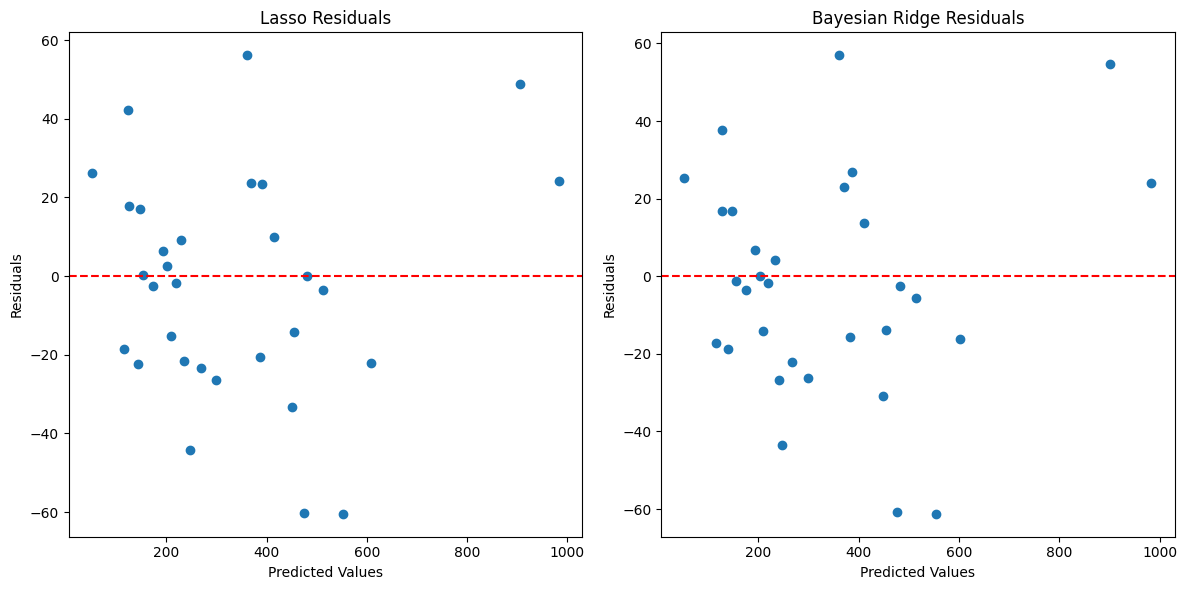

In [ ]:
# Residual Analysis for Lasso
lasso_residuals = y_test - y_pred_lasso

# Residual Analysis for Bayesian Ridge
bayesian_residuals = y_test - y_pred_bayesian

# Plot residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred_lasso, lasso_residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Lasso Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.scatter(y_pred_bayesian, bayesian_residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Bayesian Ridge Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

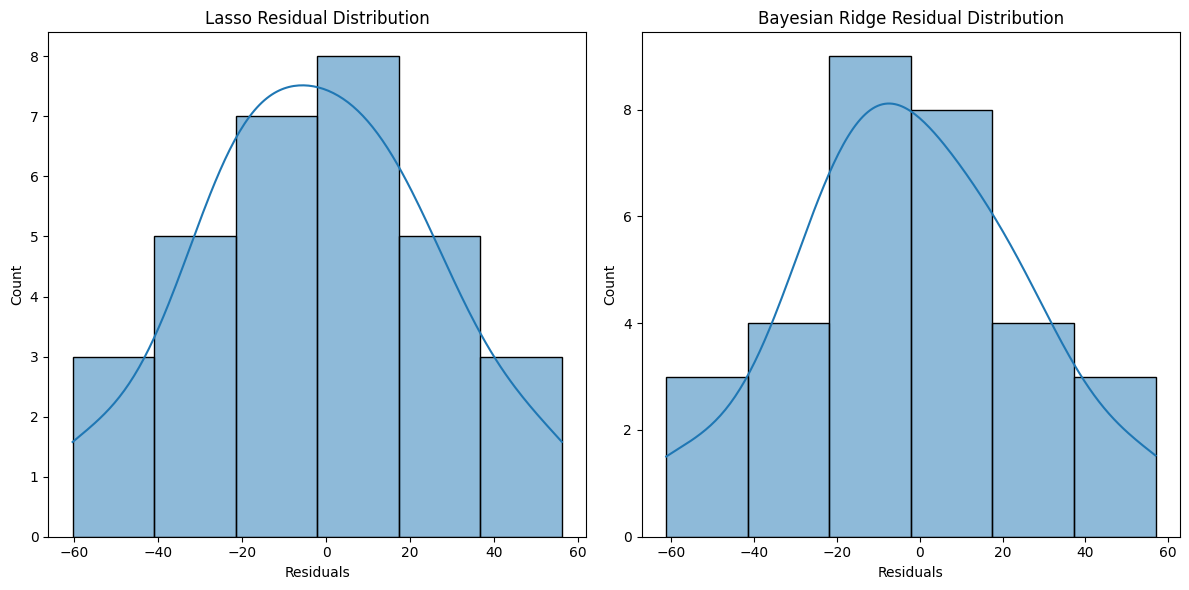

In [ ]:
# Check distribution of residuals (Normality)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(lasso_residuals, kde=True)
plt.title('Lasso Residual Distribution')
plt.xlabel('Residuals')

plt.subplot(1, 2, 2)
sns.histplot(bayesian_residuals, kde=True)
plt.title('Bayesian Ridge Residual Distribution')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

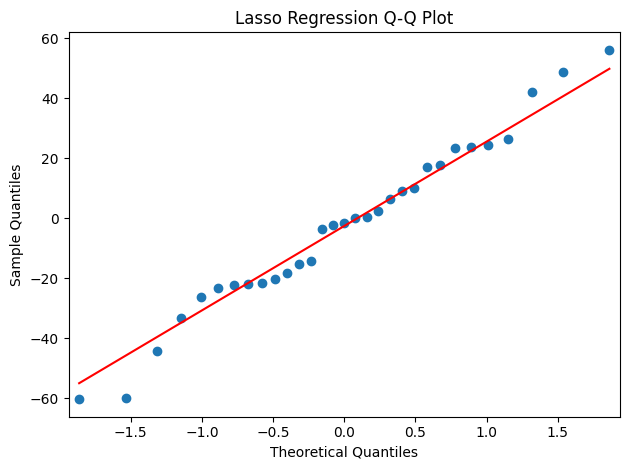

In [ ]:
# QQ plots to check for normality
plt.figure(figsize=(12, 6))

qqplot(lasso_residuals, line='s')
plt.title('Lasso Regression Q-Q Plot')

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

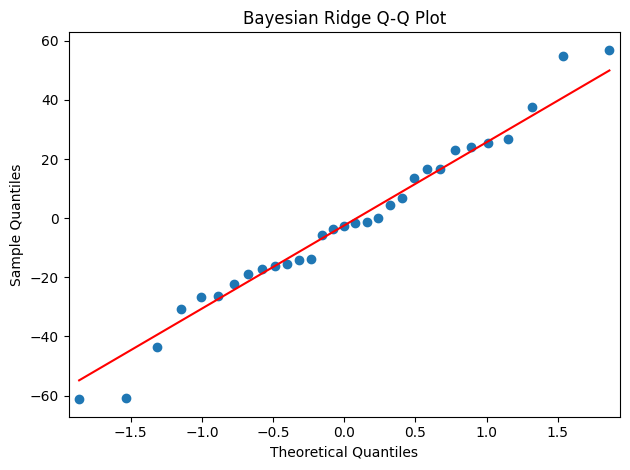

In [ ]:
# QQ plots to check for normality
plt.figure(figsize=(12, 6))

qqplot(bayesian_residuals, line='s')
plt.title('Bayesian Ridge Q-Q Plot')

plt.tight_layout()
plt.show()

#### **Residuals Evaluation**
1. **Q-Q (Quantile-Quantile Plot) :**
- **Bayesian Ridge and Lasso Q-Q diagram:** The Q-Q diagram is used to check whether the residuals obey a normal distribution. Most of the points in the figure are close to the red line, which indicates that the residual of the Bayesian Ridge model roughly follows a normal distribution, but there are some deviations at the tail of the distribution, indicating that there may be slight outliers or extreme values.
2. **Histogram of residual distribution:**
- **Residual distribution of Lasso and Bayesian Ridge:** From the histogram, the residual of the two models shows a roughly normal distribution pattern, with the distribution center near zero, which indicates that there is no significant systematic error in the model.
- **Distribution pattern:** The residual distribution pattern of the two models is very similar, which indicates that the error generated by the two models in the prediction has similar characteristics.
3. **Scatter plot of residual and predicted values:**
- **Lasso and Bayesian Ridge residual scatter plots:** Ideally, the residuals should be distributed randomly above and below the zero line, and there should be no obvious pattern or trend. The figure shows that the residuals are roughly randomly distributed around the zero line, but there are significant deviations in some places where the predicted values are large, suggesting that the model's predictions may not be accurate enough in these regions.
- **Residuals with high predicted values:** At high predicted values (above 400), the volatility of residuals increases, which may indicate a decline in the model's performance in these intervals, possibly because there are fewer samples of high predicted values in the training data, resulting in insufficient generalization of the model in these regions.

#### **In Summary:**
- **Model performance:** On the whole, the residual performance and distribution of Lasso and Bayesian Ridge models are relatively ideal, indicating that the model has a good fitting effect and there is no obvious systematic error.
- **Next step:** Consider further examining the data within these high predictive value intervals to see if you can improve the accuracy of the model's predictions in these intervals by binging the data, data enhancement, or model fine-tuning. In addition, other models or combination models can be explored to further optimize the prediction effect.

In [ ]:
from sklearn.ensemble import StackingRegressor

# Define the base models
base_models = [
    ('lasso', Lasso(alpha=0.1)),
    ('bayesian', BayesianRidge()),
    ('gradient_boosting', GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=200, random_state=42))
]

# Initialize the stacking regressor with a meta-model (linear regression in this case)
stacked_model = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression()
)

# Fit the stacked model to the training data
stacked_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_stacked = stacked_model.predict(X_test)

# Evaluate the stacked model

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_stacked)
print("Mean Absolute Error (MAE):", mae)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_stacked, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_stacked)
print("R-squared (R2):", r2)

# Explained Variance Score
evs = explained_variance_score(y_test, y_pred_stacked)
print("Explained Variance Score:", evs)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.386e+04, tolerance: 4.947e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.848e+04, tolerance: 3.917e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.041e+04, tolerance: 3.826e

Mean Absolute Error (MAE): 21.89309936337611
Root Mean Squared Error (RMSE): 28.167115933317575
R-squared (R2): 0.9832533053881966
Explained Variance Score: 0.9834374814978978


In [ ]:
# Create a dictionary to store model results
model_results_2 = {
    'Model': ['Stacking', 'Bayesian Ridge', 'Lasso', 'Gradient Boosting'],
    'MAE': [
        mean_absolute_error(y_test, y_pred_stacked),
        mean_absolute_error(y_test, y_pred_bayesian),
        mean_absolute_error(y_test, y_pred_lasso),
        mean_absolute_error(y_test, y_pred_gradient)
    ],
    'RMSE': [
        mean_squared_error(y_test, y_pred_stacked, squared=False),
        mean_squared_error(y_test, y_pred_bayesian, squared=False),
        mean_squared_error(y_test, y_pred_lasso, squared=False),
        mean_squared_error(y_test, y_pred_gradient, squared=False)
    ],
    'R2': [
        r2_score(y_test, y_pred_stacked),
        r2_score(y_test, y_pred_bayesian),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_gradient)
    ],
    'Explained Variance': [
        explained_variance_score(y_test, y_pred_stacked),
        explained_variance_score(y_test, y_pred_bayesian),
        explained_variance_score(y_test, y_pred_lasso),
        explained_variance_score(y_test, y_pred_gradient)
    ]
}

# Create a DataFrame from the dictionary
results_df_2 = pd.DataFrame(model_results_2)

# Display the results table
print(results_df_2)


               Model        MAE       RMSE        R2  Explained Variance
0           Stacking  21.893099  28.167116  0.983253            0.983437
1     Bayesian Ridge  22.221152  28.239574  0.983167            0.983292
2              Lasso  22.523488  28.275925  0.983124            0.983269
3  Gradient Boosting  41.009546  65.544527  0.909319            0.909338


#### A Stacking Model including Bayesian Ridge, Lasso and Gradient Boosting shows the best performance.



---



### Apply the model to interstate demographic datasets

In [ ]:
# Assuming 'bigview_vic.csv' is in the current directory
data_vic = pd.read_csv('bigview_vic.csv')

data_vic['P_need_assistance'] = data_vic['F_55ov_need_assistance'] + data_vic['M_55ov_need_assistance']
data_vic['P_55ov_Heart_disease'] = data_vic['F_55ov_Heart_disease'] + data_vic['M_55ov_Heart_disease']
data_vic['P_55ov_Mental_health_cond'] = data_vic['F_55ov_Mental_health_cond'] + data_vic['M_55ov_Mental_health_cond']
data_vic['P_55ov_Arthritis'] = data_vic['F_55ov_Arthritis'] + data_vic['M_55ov_Arthritis']
data_vic['P_55ov_0_499_income'] = data_vic['F_55ov_0_499_income'] + data_vic['M_55ov_0_499_income']
data_vic['P_55ov_500_999_income'] = data_vic['F_55ov_500_999_income'] + data_vic['M_55ov_500_999_income']
data_vic['P_55ov_Stroke'] = data_vic['F_55ov_Stroke'] + data_vic['M_55ov_Stroke']
data_vic['P_55ov_Asthma'] = data_vic['F_55ov_Asthma'] + data_vic['M_55ov_Asthma']
data_vic['P_55ov_Lung_cond'] = data_vic['F_55ov_Lung_cond'] + data_vic['M_55ov_Lung_cond']
data_vic['P_55ov_Kidney_disease'] = data_vic['F_55ov_Kidney_disease'] + data_vic['M_55ov_Kidney_disease']
data_vic['P_55ov_Diabetes'] = data_vic['F_55ov_Diabetes'] + data_vic['M_55ov_Diabetes']
data_vic['P_55ov_Dementia'] = data_vic['F_55ov_Dementia'] + data_vic['M_55ov_Dementia']
data_vic['P_55ov_Cancer'] = data_vic['F_55ov_Cancer'] + data_vic['M_55ov_Cancer']
data_vic['P_55ov_noneed_assistance'] = data_vic['F_55ov_noneed_assistance'] + data_vic['M_55ov_noneed_assistance']
data_vic['Age_55_64_yr_P'] = data_vic['Age_55_64_yr_F'] + data_vic['Age_55_64_yr_M']
data_vic['Age_75_84_yr_P'] = data_vic['Age_75_84_yr_F'] + data_vic['Age_75_84_yr_M']
data_vic['P_Not_in_LF_75_84'] = data_vic['F_Not_in_LF_75_84'] + data_vic['M_Not_in_LF_75_84']
data_vic['P_LonePsn_55_64'] = data_vic['F_LonePsn_55_64'] + data_vic['M_LonePsn_55_64']
data_vic['P_LonePsn_65_74'] = data_vic['F_LonePsn_65_74'] + data_vic['M_LonePsn_65_74']
data_vic['P_LonePsn_75_84'] = data_vic['F_LonePsn_75_84'] + data_vic['M_LonePsn_75_84']
data_vic['P_LonePsn_85ov'] = data_vic['F_LonePsn_85ov'] + data_vic['M_LonePsn_85ov']
data_vic['P_55ov_ev_ser'] = data_vic['F_55ov_ev_ser'] + data_vic['M_55ov_ev_ser']

# List of variables used in previous models (replace with actual variable names)
variables_vic = ['P_need_assistance',
'P_55ov_0_499_income',
'P_55ov_Mental_health_cond',
'P_55ov_Stroke',
'P_55ov_Heart_disease',
'P_55ov_Kidney_disease',
'P_55ov_Arthritis',
'P_55ov_Diabetes',
'P_55ov_Asthma',
'P_Not_in_LF_75_84',
'Age_85ov_P',
'Age_75_84_yr_P',
'P_55ov_Dementia',]

# Extract the specified variables
extracted_data_vic = data_vic[variables_vic]

# Now 'extracted_data' contains a DataFrame with only the desired variables
extracted_data_vic.head()

P_need_assistance  P_55ov_0_499_income  P_55ov_Mental_health_cond  \
0                321                  705                        159   
1                554                  986                        299   
2                510                  937                        213   
3                512                 1004                        244   
4                428                  920                        280   

   P_55ov_Stroke  P_55ov_Heart_disease  P_55ov_Kidney_disease  \
0             33                   193                     35   
1             94                   322                     80   
2             75                   304                     63   
3             67                   261                     74   
4             64                   227                     62   

   P_55ov_Arthritis  P_55ov_Diabetes  P_55ov_Asthma  P_Not_in_LF_75_84  \
0               428              224            171                325   
1               714              388            267                487   
2               626              358            213                417   
3               556              364            219                478   
4               514              300            209                369   

   Age_85ov_P  Age_75_84_yr_P  P_55ov_Dementia  
0         168             367               28  
1         283             564              105  
2         326             461               92  
3         222             525               43  
4         228             418               94

In [ ]:
# Assuming 'extracted_data' is the new DataFrame with the same features as the training data

# Separate features and target variable for the new data
X_vic = extracted_data_vic.drop('P_need_assistance', axis=1)
y_vic = extracted_data_vic['P_need_assistance']

# Predictions using the trained models
y_pred_lasso_vic = lasso_model.predict(X_vic)
y_pred_bayesian_vic = bayesian_model.predict(X_vic)
y_pred_gradient_vic = gb_model.predict(X_vic)
y_pred_stacked_vic = stacked_model.predict(X_vic)

# Evaluate the models on the new data
model_results_vic = {
    'Model': ['Stacking', 'Bayesian Ridge', 'Lasso', 'Gradient Boosting'],
    'MAE': [
        mean_absolute_error(y_vic, y_pred_stacked_vic),
        mean_absolute_error(y_vic, y_pred_bayesian_vic),
        mean_absolute_error(y_vic, y_pred_lasso_vic),
        mean_absolute_error(y_vic, y_pred_gradient_vic)
    ],
    'RMSE': [
        mean_squared_error(y_vic, y_pred_stacked_vic, squared=False),
        mean_squared_error(y_vic, y_pred_bayesian_vic, squared=False),
        mean_squared_error(y_vic, y_pred_lasso_vic, squared=False),
        mean_squared_error(y_vic, y_pred_gradient_vic, squared=False)
    ],
    'R2': [
        r2_score(y_vic, y_pred_stacked_vic),
        r2_score(y_vic, y_pred_bayesian_vic),
        r2_score(y_vic, y_pred_lasso_vic),
        r2_score(y_vic, y_pred_gradient_vic)
    ],
    'Explained Variance': [
        explained_variance_score(y_vic, y_pred_stacked_vic),
        explained_variance_score(y_vic, y_pred_bayesian_vic),
        explained_variance_score(y_vic, y_pred_lasso_vic),
        explained_variance_score(y_vic, y_pred_gradient_vic)
    ]
}

# Create a DataFrame from the dictionary
results_df_vic = pd.DataFrame(model_results_vic)

# Display the results table
print(results_df_vic)


               Model         MAE        RMSE        R2  Explained Variance
0           Stacking   91.404003  126.549212  0.831427            0.914870
1     Bayesian Ridge   92.279825  127.172175  0.829763            0.914938
2              Lasso   92.598720  127.003566  0.830214            0.915545
3  Gradient Boosting  111.658150  159.469543  0.732315            0.829544




---



In [ ]:
# Assuming 'bigview_vic.csv' is in the current directory
data_nsw = pd.read_csv('bigview_nsw.csv')

data_nsw['P_need_assistance'] = data_nsw['F_55ov_need_assistance'] + data_nsw['M_55ov_need_assistance']
data_nsw['P_55ov_Heart_disease'] = data_nsw['F_55ov_Heart_disease'] + data_nsw['M_55ov_Heart_disease']
data_nsw['P_55ov_Mental_health_cond'] = data_nsw['F_55ov_Mental_health_cond'] + data_nsw['M_55ov_Mental_health_cond']
data_nsw['P_55ov_Arthritis'] = data_nsw['F_55ov_Arthritis'] + data_nsw['M_55ov_Arthritis']
data_nsw['P_55ov_0_499_income'] = data_nsw['F_55ov_0_499_income'] + data_nsw['M_55ov_0_499_income']
data_nsw['P_55ov_500_999_income'] = data_nsw['F_55ov_500_999_income'] + data_nsw['M_55ov_500_999_income']
data_nsw['P_55ov_Stroke'] = data_nsw['F_55ov_Stroke'] + data_nsw['M_55ov_Stroke']
data_nsw['P_55ov_Asthma'] = data_nsw['F_55ov_Asthma'] + data_nsw['M_55ov_Asthma']
data_nsw['P_55ov_Lung_cond'] = data_nsw['F_55ov_Lung_cond'] + data_nsw['M_55ov_Lung_cond']
data_nsw['P_55ov_Kidney_disease'] = data_nsw['F_55ov_Kidney_disease'] + data_nsw['M_55ov_Kidney_disease']
data_nsw['P_55ov_Diabetes'] = data_nsw['F_55ov_Diabetes'] + data_nsw['M_55ov_Diabetes']
data_nsw['P_55ov_Dementia'] = data_nsw['F_55ov_Dementia'] + data_nsw['M_55ov_Dementia']
data_nsw['P_55ov_Cancer'] = data_nsw['F_55ov_Cancer'] + data_nsw['M_55ov_Cancer']
data_nsw['P_55ov_noneed_assistance'] = data_nsw['F_55ov_noneed_assistance'] + data_nsw['M_55ov_noneed_assistance']
data_nsw['Age_55_64_yr_P'] = data_nsw['Age_55_64_yr_F'] + data_nsw['Age_55_64_yr_M']
data_nsw['Age_75_84_yr_P'] = data_nsw['Age_75_84_yr_F'] + data_nsw['Age_75_84_yr_M']
data_nsw['P_Not_in_LF_75_84'] = data_nsw['F_Not_in_LF_75_84'] + data_nsw['M_Not_in_LF_75_84']
data_nsw['P_LonePsn_55_64'] = data_nsw['F_LonePsn_55_64'] + data_nsw['M_LonePsn_55_64']
data_nsw['P_LonePsn_65_74'] = data_nsw['F_LonePsn_65_74'] + data_nsw['M_LonePsn_65_74']
data_nsw['P_LonePsn_75_84'] = data_nsw['F_LonePsn_75_84'] + data_nsw['M_LonePsn_75_84']
data_nsw['P_LonePsn_85ov'] = data_nsw['F_LonePsn_85ov'] + data_nsw['M_LonePsn_85ov']
data_nsw['P_55ov_ev_ser'] = data_nsw['F_55ov_ev_ser'] + data_nsw['M_55ov_ev_ser']

# List of variables used in previous models (replace with actual variable names)
variables_nsw = ['P_need_assistance',
'P_55ov_0_499_income',
'P_55ov_Mental_health_cond',
'P_55ov_Stroke',
'P_55ov_Heart_disease',
'P_55ov_Kidney_disease',
'P_55ov_Arthritis',
'P_55ov_Diabetes',
'P_55ov_Asthma',
'P_Not_in_LF_75_84',
'Age_85ov_P',
'Age_75_84_yr_P',
'P_55ov_Dementia',]

# Extract the specified variables
extracted_data_nsw = data_nsw[variables_nsw]

# Separate features and target variable for the new data
X_nsw = extracted_data_nsw.drop('P_need_assistance', axis=1)
y_nsw = extracted_data_nsw['P_need_assistance']

# Predictions using the trained models
y_pred_lasso_nsw = lasso_model.predict(X_nsw)
y_pred_bayesian_nsw = bayesian_model.predict(X_nsw)
y_pred_gradient_nsw = gb_model.predict(X_nsw)
y_pred_stacked_nsw = stacked_model.predict(X_nsw)

# Evaluate the models on the new data
model_results_nsw = {
    'Model': ['Stacking', 'Bayesian Ridge', 'Lasso', 'Gradient Boosting'],
    'MAE': [
        mean_absolute_error(y_nsw, y_pred_stacked_nsw),
        mean_absolute_error(y_nsw, y_pred_bayesian_nsw),
        mean_absolute_error(y_nsw, y_pred_lasso_nsw),
        mean_absolute_error(y_nsw, y_pred_gradient_nsw)
    ],
    'RMSE': [
        mean_squared_error(y_nsw, y_pred_stacked_nsw, squared=False),
        mean_squared_error(y_nsw, y_pred_bayesian_nsw, squared=False),
        mean_squared_error(y_nsw, y_pred_lasso_nsw, squared=False),
        mean_squared_error(y_nsw, y_pred_gradient_nsw, squared=False)
    ],
    'R2': [
        r2_score(y_nsw, y_pred_stacked_nsw),
        r2_score(y_nsw, y_pred_bayesian_nsw),
        r2_score(y_nsw, y_pred_lasso_nsw),
        r2_score(y_nsw, y_pred_gradient_nsw)
    ],
    'Explained Variance': [
        explained_variance_score(y_nsw, y_pred_stacked_nsw),
        explained_variance_score(y_nsw, y_pred_bayesian_nsw),
        explained_variance_score(y_nsw, y_pred_lasso_nsw),
        explained_variance_score(y_nsw, y_pred_gradient_nsw)
    ]
}

# Create a DataFrame from the dictionary
results_df_nsw = pd.DataFrame(model_results_nsw)

# Display the results table
print(results_df_nsw)

               Model         MAE        RMSE        R2  Explained Variance
0           Stacking   89.595586  139.382572  0.803687            0.866453
1     Bayesian Ridge   89.682158  138.716939  0.805557            0.867764
2              Lasso   89.195034  137.341055  0.809395            0.869720
3  Gradient Boosting  114.829279  174.991625  0.690567            0.773622


In [ ]:
# Assuming 'bigview_qld.csv' is in the current directory
data_qld = pd.read_csv('bigview_qld.csv')

data_qld['P_need_assistance'] = data_qld['F_55ov_need_assistance'] + data_qld['M_55ov_need_assistance']
data_qld['P_55ov_Heart_disease'] = data_qld['F_55ov_Heart_disease'] + data_qld['M_55ov_Heart_disease']
data_qld['P_55ov_Mental_health_cond'] = data_qld['F_55ov_Mental_health_cond'] + data_qld['M_55ov_Mental_health_cond']
data_qld['P_55ov_Arthritis'] = data_qld['F_55ov_Arthritis'] + data_qld['M_55ov_Arthritis']
data_qld['P_55ov_0_499_income'] = data_qld['F_55ov_0_499_income'] + data_qld['M_55ov_0_499_income']
data_qld['P_55ov_500_999_income'] = data_qld['F_55ov_500_999_income'] + data_qld['M_55ov_500_999_income']
data_qld['P_55ov_Stroke'] = data_qld['F_55ov_Stroke'] + data_qld['M_55ov_Stroke']
data_qld['P_55ov_Asthma'] = data_qld['F_55ov_Asthma'] + data_qld['M_55ov_Asthma']
data_qld['P_55ov_Lung_cond'] = data_qld['F_55ov_Lung_cond'] + data_qld['M_55ov_Lung_cond']
data_qld['P_55ov_Kidney_disease'] = data_qld['F_55ov_Kidney_disease'] + data_qld['M_55ov_Kidney_disease']
data_qld['P_55ov_Diabetes'] = data_qld['F_55ov_Diabetes'] + data_qld['M_55ov_Diabetes']
data_qld['P_55ov_Dementia'] = data_qld['F_55ov_Dementia'] + data_qld['M_55ov_Dementia']
data_qld['P_55ov_Cancer'] = data_qld['F_55ov_Cancer'] + data_qld['M_55ov_Cancer']
data_qld['P_55ov_noneed_assistance'] = data_qld['F_55ov_noneed_assistance'] + data_qld['M_55ov_noneed_assistance']
data_qld['Age_55_64_yr_P'] = data_qld['Age_55_64_yr_F'] + data_qld['Age_55_64_yr_M']
data_qld['Age_75_84_yr_P'] = data_qld['Age_75_84_yr_F'] + data_qld['Age_75_84_yr_M']
data_qld['P_Not_in_LF_75_84'] = data_qld['F_Not_in_LF_75_84'] + data_qld['M_Not_in_LF_75_84']
data_qld['P_LonePsn_55_64'] = data_qld['F_LonePsn_55_64'] + data_qld['M_LonePsn_55_64']
data_qld['P_LonePsn_65_74'] = data_qld['F_LonePsn_65_74'] + data_qld['M_LonePsn_65_74']
data_qld['P_LonePsn_75_84'] = data_qld['F_LonePsn_75_84'] + data_qld['M_LonePsn_75_84']
data_qld['P_LonePsn_85ov'] = data_qld['F_LonePsn_85ov'] + data_qld['M_LonePsn_85ov']
data_qld['P_55ov_ev_ser'] = data_qld['F_55ov_ev_ser'] + data_qld['M_55ov_ev_ser']

# List of variables used in previous models (replace with actual variable names)
variables_qld = ['P_need_assistance',
'P_55ov_0_499_income',
'P_55ov_Mental_health_cond',
'P_55ov_Stroke',
'P_55ov_Heart_disease',
'P_55ov_Kidney_disease',
'P_55ov_Arthritis',
'P_55ov_Diabetes',
'P_55ov_Asthma',
'P_Not_in_LF_75_84',
'Age_85ov_P',
'Age_75_84_yr_P',
'P_55ov_Dementia',]

# Extract the specified variables
extracted_data_qld = data_qld[variables_qld]

# Separate features and target variable for the new data
X_qld = extracted_data_qld.drop('P_need_assistance', axis=1)
y_qld = extracted_data_qld['P_need_assistance']

# Predictions using the trained models
y_pred_lasso_qld = lasso_model.predict(X_qld)
y_pred_bayesian_qld = bayesian_model.predict(X_qld)
y_pred_gradient_qld = gb_model.predict(X_qld)
y_pred_stacked_qld = stacked_model.predict(X_qld)

# Evaluate the models on the new data
model_results_qld = {
    'Model': ['Stacking', 'Bayesian Ridge', 'Lasso', 'Gradient Boosting'],
    'MAE': [
        mean_absolute_error(y_qld, y_pred_stacked_qld),
        mean_absolute_error(y_qld, y_pred_bayesian_qld),
        mean_absolute_error(y_qld, y_pred_lasso_qld),
        mean_absolute_error(y_qld, y_pred_gradient_qld)
    ],
    'RMSE': [
        mean_squared_error(y_qld, y_pred_stacked_qld, squared=False),
        mean_squared_error(y_qld, y_pred_bayesian_qld, squared=False),
        mean_squared_error(y_qld, y_pred_lasso_qld, squared=False),
        mean_squared_error(y_qld, y_pred_gradient_qld, squared=False)
    ],
    'R2': [
        r2_score(y_qld, y_pred_stacked_qld),
        r2_score(y_qld, y_pred_bayesian_qld),
        r2_score(y_qld, y_pred_lasso_qld),
        r2_score(y_qld, y_pred_gradient_qld)
    ],
    'Explained Variance': [
        explained_variance_score(y_qld, y_pred_stacked_qld),
        explained_variance_score(y_qld, y_pred_bayesian_qld),
        explained_variance_score(y_qld, y_pred_lasso_qld),
        explained_variance_score(y_qld, y_pred_gradient_qld)
    ]
}

# Create a DataFrame from the dictionary
results_df_qld = pd.DataFrame(model_results_qld)

# Display the results table
print(results_df_qld)

               Model        MAE       RMSE        R2  Explained Variance
0           Stacking  48.867650  68.885913  0.932472            0.962520
1     Bayesian Ridge  49.454427  69.754056  0.930760            0.961856
2              Lasso  49.813436  70.153938  0.929963            0.961553
3  Gradient Boosting  53.193396  96.319958  0.867976            0.886447


In [ ]:
# Assuming 'bigview_sa.csv' is in the current directory
data_sa = pd.read_csv('bigview_sa.csv')

data_sa['P_need_assistance'] = data_sa['F_55ov_need_assistance'] + data_sa['M_55ov_need_assistance']
data_sa['P_55ov_Heart_disease'] = data_sa['F_55ov_Heart_disease'] + data_sa['M_55ov_Heart_disease']
data_sa['P_55ov_Mental_health_cond'] = data_sa['F_55ov_Mental_health_cond'] + data_sa['M_55ov_Mental_health_cond']
data_sa['P_55ov_Arthritis'] = data_sa['F_55ov_Arthritis'] + data_sa['M_55ov_Arthritis']
data_sa['P_55ov_0_499_income'] = data_sa['F_55ov_0_499_income'] + data_sa['M_55ov_0_499_income']
data_sa['P_55ov_500_999_income'] = data_sa['F_55ov_500_999_income'] + data_sa['M_55ov_500_999_income']
data_sa['P_55ov_Stroke'] = data_sa['F_55ov_Stroke'] + data_sa['M_55ov_Stroke']
data_sa['P_55ov_Asthma'] = data_sa['F_55ov_Asthma'] + data_sa['M_55ov_Asthma']
data_sa['P_55ov_Lung_cond'] = data_sa['F_55ov_Lung_cond'] + data_sa['M_55ov_Lung_cond']
data_sa['P_55ov_Kidney_disease'] = data_sa['F_55ov_Kidney_disease'] + data_sa['M_55ov_Kidney_disease']
data_sa['P_55ov_Diabetes'] = data_sa['F_55ov_Diabetes'] + data_sa['M_55ov_Diabetes']
data_sa['P_55ov_Dementia'] = data_sa['F_55ov_Dementia'] + data_sa['M_55ov_Dementia']
data_sa['P_55ov_Cancer'] = data_sa['F_55ov_Cancer'] + data_sa['M_55ov_Cancer']
data_sa['P_55ov_noneed_assistance'] = data_sa['F_55ov_noneed_assistance'] + data_sa['M_55ov_noneed_assistance']
data_sa['Age_55_64_yr_P'] = data_sa['Age_55_64_yr_F'] + data_sa['Age_55_64_yr_M']
data_sa['Age_75_84_yr_P'] = data_sa['Age_75_84_yr_F'] + data_sa['Age_75_84_yr_M']
data_sa['P_Not_in_LF_75_84'] = data_sa['F_Not_in_LF_75_84'] + data_sa['M_Not_in_LF_75_84']
data_sa['P_LonePsn_55_64'] = data_sa['F_LonePsn_55_64'] + data_sa['M_LonePsn_55_64']
data_sa['P_LonePsn_65_74'] = data_sa['F_LonePsn_65_74'] + data_sa['M_LonePsn_65_74']
data_sa['P_LonePsn_75_84'] = data_sa['F_LonePsn_75_84'] + data_sa['M_LonePsn_75_84']
data_sa['P_LonePsn_85ov'] = data_sa['F_LonePsn_85ov'] + data_sa['M_LonePsn_85ov']
data_sa['P_55ov_ev_ser'] = data_sa['F_55ov_ev_ser'] + data_sa['M_55ov_ev_ser']

# List of variables used in previous models (replace with actual variable names)
variables_sa = ['P_need_assistance',
'P_55ov_0_499_income',
'P_55ov_Mental_health_cond',
'P_55ov_Stroke',
'P_55ov_Heart_disease',
'P_55ov_Kidney_disease',
'P_55ov_Arthritis',
'P_55ov_Diabetes',
'P_55ov_Asthma',
'P_Not_in_LF_75_84',
'Age_85ov_P',
'Age_75_84_yr_P',
'P_55ov_Dementia',]

# Extract the specified variables
extracted_data_sa = data_sa[variables_sa]

# Separate features and target variable for the new data
X_sa = extracted_data_sa.drop('P_need_assistance', axis=1)
y_sa = extracted_data_sa['P_need_assistance']

# Predictions using the trained models
y_pred_lasso_sa = lasso_model.predict(X_sa)
y_pred_bayesian_sa = bayesian_model.predict(X_sa)
y_pred_gradient_sa = gb_model.predict(X_sa)
y_pred_stacked_sa = stacked_model.predict(X_sa)

# Evaluate the models on the new data
model_results_sa = {
    'Model': ['Stacking', 'Bayesian Ridge', 'Lasso', 'Gradient Boosting'],
    'MAE': [
        mean_absolute_error(y_sa, y_pred_stacked_sa),
        mean_absolute_error(y_sa, y_pred_bayesian_sa),
        mean_absolute_error(y_sa, y_pred_lasso_sa),
        mean_absolute_error(y_sa, y_pred_gradient_sa)
    ],
    'RMSE': [
        mean_squared_error(y_sa, y_pred_stacked_sa, squared=False),
        mean_squared_error(y_sa, y_pred_bayesian_sa, squared=False),
        mean_squared_error(y_sa, y_pred_lasso_sa, squared=False),
        mean_squared_error(y_sa, y_pred_gradient_sa, squared=False)
    ],
    'R2': [
        r2_score(y_sa, y_pred_stacked_sa),
        r2_score(y_sa, y_pred_bayesian_sa),
        r2_score(y_sa, y_pred_lasso_sa),
        r2_score(y_sa, y_pred_gradient_sa)
    ],
    'Explained Variance': [
        explained_variance_score(y_sa, y_pred_stacked_sa),
        explained_variance_score(y_sa, y_pred_bayesian_sa),
        explained_variance_score(y_sa, y_pred_lasso_sa),
        explained_variance_score(y_sa, y_pred_gradient_sa)
    ]
}

# Create a DataFrame from the dictionary
results_df_sa = pd.DataFrame(model_results_sa)

# Display the results table
print(results_df_sa)

               Model        MAE        RMSE        R2  Explained Variance
0           Stacking  44.233730   59.000385  0.969352            0.973794
1     Bayesian Ridge  45.337316   61.156207  0.967071            0.972866
2              Lasso  46.098642   62.551411  0.965551            0.972347
3  Gradient Boosting  80.030009  113.365529  0.886849            0.895673


#### Generally speaking, our original model can well predict the interstate data. An interesting thing here is that our model perform very well on Queensland and South Australia dataset, whereas the illustraion on New South Wales and Victoria data is significantly decrease. Now we want to find any similarity inside of them.

In [ ]:
# Fit Lasso regression to the South Australia data
lasso_sa = Lasso(alpha=0.1)  # You might need to tune the alpha parameter
lasso_sa.fit(X_sa, y_sa)

# Get feature importances
feature_importances_sa = pd.DataFrame({
    'Feature': X_sa.columns,
    'Importance': lasso_sa.coef_
}).sort_values('Importance', key=abs, ascending=False)

print(feature_importances_sa)

# Evaluate the model
y_pred_lasso_sa = lasso_sa.predict(X_sa)
print("MAE:", mean_absolute_error(y_sa, y_pred_lasso_sa))
print("RMSE:", mean_squared_error(y_sa, y_pred_lasso_sa, squared=False))
print("R2:", r2_score(y_sa, y_pred_lasso_sa))
print("Explained Variance:", explained_variance_score(y_sa, y_pred_lasso_sa))


                      Feature  Importance
9                  Age_85ov_P    0.707616
6             P_55ov_Diabetes    0.561636
1   P_55ov_Mental_health_cond    0.554654
11            P_55ov_Dementia    0.353436
2               P_55ov_Stroke    0.307697
5            P_55ov_Arthritis   -0.289022
4       P_55ov_Kidney_disease   -0.211238
0         P_55ov_0_499_income    0.135271
10             Age_75_84_yr_P   -0.124475
3        P_55ov_Heart_disease   -0.110005
7               P_55ov_Asthma   -0.079699
8           P_Not_in_LF_75_84    0.014343
MAE: 31.91840621439466
RMSE: 41.31879980512019
R2: 0.9849688419835171
Explained Variance: 0.9849688419835171


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.403e+04, tolerance: 1.272e+03
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Fit Lasso regression to the South Australia data
lasso_qld = Lasso(alpha=0.1)  # You might need to tune the alpha parameter
lasso_qld.fit(X_qld, y_qld)

# Get feature importances
feature_importances_qld = pd.DataFrame({
    'Feature': X_qld.columns,
    'Importance': lasso_qld.coef_
}).sort_values('Importance', key=abs, ascending=False)

print(feature_importances_qld)

# Evaluate the model
y_pred_lasso_qld = lasso_qld.predict(X_qld)
print("MAE:", mean_absolute_error(y_qld, y_pred_lasso_qld))
print("RMSE:", mean_squared_error(y_qld, y_pred_lasso_qld, squared=False))
print("R2:", r2_score(y_qld, y_pred_lasso_qld))
print("Explained Variance:", explained_variance_score(y_qld, y_pred_lasso_qld))


                      Feature  Importance
11            P_55ov_Dementia    0.891008
4       P_55ov_Kidney_disease    0.788107
3        P_55ov_Heart_disease   -0.507922
2               P_55ov_Stroke    0.439096
9                  Age_85ov_P    0.378935
1   P_55ov_Mental_health_cond    0.352885
6             P_55ov_Diabetes    0.335193
10             Age_75_84_yr_P   -0.143259
8           P_Not_in_LF_75_84    0.136489
0         P_55ov_0_499_income    0.116806
5            P_55ov_Arthritis    0.025292
7               P_55ov_Asthma   -0.018761
MAE: 26.025900660389176
RMSE: 35.361011223097215
R2: 0.9822061530391709
Explained Variance: 0.9822061530391709


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.128e+05, tolerance: 1.729e+03
  model = cd_fast.enet_coordinate_descent(


#### *More analysis could be applied here...*

### **Conclusion:**
- This notebook mainly focused on feature engineering and data modeling.
- The notebook use the demographic data of WA-SA2. With the selected features, it is found that the number of people living in a surburb who has stroke/mental health condition/dementia/low income/heart disease/diabetes/over 85 years old statistically need core acitivity assistance. This inspires that all these variables worth further investigating during EDA.
- From the prediction perspective, the features above contribute significant importance on predicting the number of people needed core activity assistance. Additionally, the notebook built a Stacking model which blended Lasso Regression, Bayesian Ridge and Gradient Boosting together. The model performs well not only on Western Australia's census data but also on Queensland's and South Australia's data. This means Melville Cares now is capable to apply a basic machine learning model and to predict the residents needed assistance in a certain suburb by given the corresponding data. While the census data is updated not frequently, we can predict by requesting/having the data from any sources. And so that we can re-evaluate/adjust the priorty areas more responsively and specifically.
- A pbix. dashboard will be attached with this notebook for further visualisation by mainly using the features above.